## Pizza Hut Sentiment Analysis (EDA)

### Capstone Project

#### Vernon Chun
#### 19 May 2023

### Introduction

Pizza Hut competes in the food service industry both in the United States and internationally. Although its speciality is pizza, it also offers pasta, chicken wings, salads and desserts. The industry is extremely competitive with numerous other significant players such as Domino’s Pizza, MacDonalds and KFC. Characteristics of the industry include extreme price competition, fast-changing consumer preferences and a focus on speed and convenience.

As a consequence of the recent COVID-19 pandemic, the entire industry has had to adapt their operating models from the traditional in-dining restaurants to takeout and delivery models, in order to meet the ever-changing needs of its consumers. Consequently, the ability to order online using mobile apps is key. In a similar vein social media are becoming more vital in driving revenue and customer engagement.

Given the heightened focus to better understanding customers, the focus of this capstone project is to ascertain Pizza Hut customer sentiment from their reviews on an established crowd-sourced business review site such as Yelp. This will equip Pizza Hut with the information to make data-driven decisions.


### Data Source and Datasets generation

https://www.yelp.com/dataset

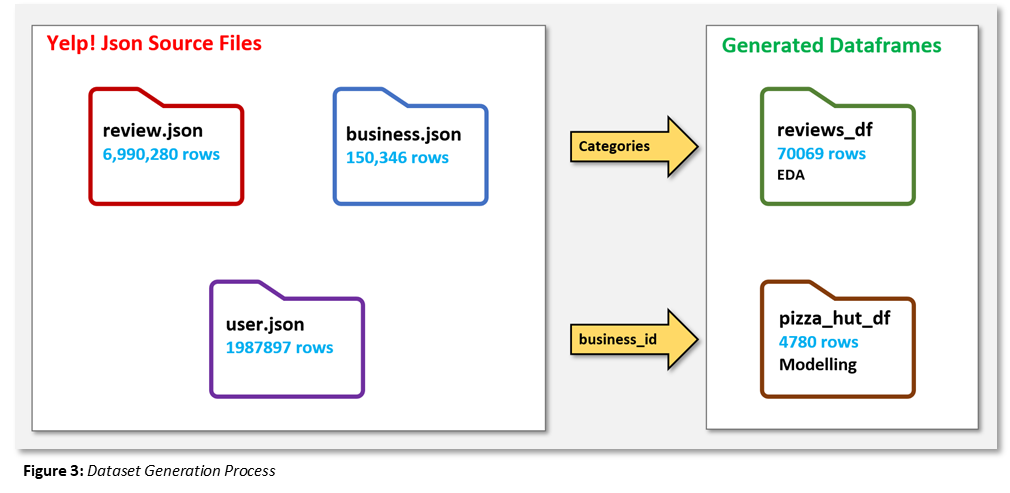

### Data Pre-Processing

In [34]:
# Import Libraries

import json
import numpy as np
import pandas as pd
from datetime import datetime

import re
import string

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from functools import reduce

from sklearn.feature_extraction.text import CountVectorizer



In [35]:
# Initial Extract and convert Yelp review.json file to d1 dataframe

# import json
# import pandas as pd


# d1 = []

# with open(r'C:\Users\verno\IOD\Capstone\yelp\yelp_dataset\review.json', 'r', encoding='utf-8') as file:
#     for line in file:
#         d1.append(json.loads(line))

# df = pd.DataFrame(d1)

In [36]:
# Write to csv

# df.to_csv('d1.csv')



In [37]:
# Read previously created csv file from above

df = pd.read_csv(r'C:\Users\verno\IOD\Capstone\yelp\d1.csv')

In [38]:
# Display first 5 rows of dataset

df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   review_id    object 
 2   user_id      object 
 3   business_id  object 
 4   stars        float64
 5   useful       int64  
 6   funny        int64  
 7   cool         int64  
 8   text         object 
 9   date         object 
dtypes: float64(1), int64(4), object(5)
memory usage: 533.3+ MB


As shown above the json review file is quite large with 6.9 million rows

In [40]:
# # Extract and convert business.json to d2 dataframe

# d2 = []

# with open(r'C:\Users\verno\IOD\Capstone\yelp\yelp_dataset\yelp_dataset~\yelp_academic_dataset_business.json', 'r', encoding='utf-8') as file:
#      for line in file:
#          d2.append(json.loads(line))

# df2 = pd.DataFrame(d2)

In [41]:
# Write business.json to csv

# df2.to_csv('d2.csv')

In [42]:
# Read previously created business csv file from above

df2 = pd.read_csv(r'C:\Users\verno\IOD\Capstone\yelp\d2.csv')

In [43]:
# View dataframe
df2

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",NaN
150344,150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


As shown above (business) name will be determined and joined to the review (df1 dataset) using business_id

In [44]:
# Check columns
df2.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [45]:
# Remove unwanted columns in df2

df2 = df2[['business_id','name','city', 'state', 'latitude', 'longitude','is_open','categories']]

In [46]:
# Check again

df2

,business_id,name,city,state,latitude,longitude,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,34.426679,-119.711197,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,38.551126,-90.335695,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,32.223236,-110.880452,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,39.955505,-75.155564,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,40.338183,-75.471659,1,"Brewpubs, Breweries, Food"
...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,Edmonton,AB,53.468419,-113.492054,1,"Nail Salons, Beauty & Spas"
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,Nashville,TN,36.115118,-86.766925,1,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,Indianapolis,IN,39.908707,-86.065088,1,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,Edwardsville,IL,38.782351,-89.950558,1,"Fitness/Exercise Equipment, Eyewear & Optician..."


In [47]:
# Combine review and business files 

merged_df = pd.merge(df, df2, on='business_id', how='left')

In [48]:
# View dataframe

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990280 entries, 0 to 6990279
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   review_id    object 
 2   user_id      object 
 3   business_id  object 
 4   stars        float64
 5   useful       int64  
 6   funny        int64  
 7   cool         int64  
 8   text         object 
 9   date         object 
 10  name         object 
 11  city         object 
 12  state        object 
 13  latitude     float64
 14  longitude    float64
 15  is_open      int64  
 16  categories   object 
dtypes: float64(3), int64(5), object(9)
memory usage: 960.0+ MB


In [49]:
# Extract and convert review.json to d3 dataframe

# d3 = []

# with open(r'C:\Users\verno\IOD\Capstone\yelp\yelp_dataset\yelp_dataset~\yelp_academic_dataset_user.json', 'r', encoding='utf-8') as file:
#      for line in file:
#          d3.append(json.loads(line))

# df3 = pd.DataFrame(d3)

In [50]:
# Write user.json to csv

# df3.to_csv('d3.csv')

In [68]:
# Read previously created d3.csv file from above

df3 = pd.read_csv(r'C:\Users\verno\IOD\Capstone\yelp\d3.csv')

In [69]:
# View dataframe

df3

,Unnamed: 0,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",...,65,55,56,18,232,844,467,467,239,180
1,1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",...,13,10,17,3,66,96,119,119,35,18
3,3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",...,4,1,6,2,12,16,26,26,10,9
4,4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,NaN,None,...,0,0,0,0,0,0,0,0,0,0
1987893,1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52,0,0,0,NaN,None,...,0,0,0,0,0,0,0,0,0,0
1987894,1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58,1,1,0,NaN,None,...,0,0,0,0,0,0,0,0,0,0
1987895,1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08,0,0,0,NaN,None,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Amend to only include required columns

df3 = df3[['user_id', 'name','review_count', 'yelping_since']]

In [71]:
# Check amendment

df3

,user_id,name,review_count,yelping_since
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59
...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08


In [72]:
# Reformat yelping_since column 

#df3.loc[:, 'yelping_since'] = pd.to_datetime(df3['yelping_since'])
df3.loc[:, 'yelping_since'] = pd.to_datetime(df3['yelping_since']).dt.strftime('%d-%m-%Y')


C:\Users\verno\AppData\Local\Temp\ipykernel_1376\2010194771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'yelping_since'] = pd.to_datetime(df3['yelping_since']).dt.strftime('%d-%m-%Y')


In [74]:
# Check change

df3

,user_id,name,review_count,yelping_since
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,25-01-2007
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,25-01-2009
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,25-07-2008
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,29-11-2005
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,05-01-2007
...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,06-01-2015
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,14-06-2016
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,04-02-2017
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,14-01-2011


In [75]:
# Create new year_start column

# convert the date column to datetime format

df3.loc[:, 'yelping_since'] = pd.to_datetime(df3['yelping_since'], format='%d-%m-%Y')

# Extract the year values using the .dt accessor and .year attribute

df3.loc[:, 'year_start'] = df3['yelping_since'].dt.year


C:\Users\verno\AppData\Local\Temp\ipykernel_1376\78132819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'yelping_since'] = pd.to_datetime(df3['yelping_since'], format='%d-%m-%Y')
C:\Users\verno\AppData\Local\Temp\ipykernel_1376\78132819.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'year_start'] = df3['yelping_since'].dt.year


In [76]:
df3

,user_id,name,review_count,yelping_since,year_start
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25,2007
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25,2009
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25,2008
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29,2005
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05,2007
...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06,2015
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14,2016
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04,2017
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14,2011


In [77]:
# Calculate the yelp review years of experience

current_year = datetime.now().year
df3.loc[:,'years_yelp'] = current_year - df3['year_start']

C:\Users\verno\AppData\Local\Temp\ipykernel_1376\2569508182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,'years_yelp'] = current_year - df3['year_start']


In [78]:
# Check amended df3 with new years_yelp

df3

,user_id,name,review_count,yelping_since,year_start,years_yelp
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25,2007,16
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25,2009,14
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25,2008,15
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29,2005,18
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05,2007,16
...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06,2015,8
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14,2016,7
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04,2017,6
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14,2011,12


In [79]:
# Combine merged df and user files 

merged_df = pd.merge(merged_df, df3, on='user_id', how='left')

In [80]:
# Check columns

merged_df.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date', 'name_x', 'city', 'state', 'latitude',
       'longitude', 'is_open', 'categories', 'name_y', 'review_count',
       'yelping_since', 'year_start', 'years_yelp'],
      dtype='object')

In [81]:
# Check merged df

merged_df 

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,state,latitude,longitude,is_open,categories,name_y,review_count,yelping_since,year_start,years_yelp
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,...,PA,40.210196,-75.223639,1,"Restaurants, Breakfast & Brunch, Food, Juice B...",Melanie,33.0,2016-01-13,2016.0,7.0
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,...,PA,39.952103,-75.172753,0,"Active Life, Cycling Classes, Trainers, Gyms, ...",Erin,10.0,2011-03-07,2011.0,12.0
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,...,AZ,32.207233,-110.980864,1,"Restaurants, Breakfast & Brunch",Debra,1332.0,2012-09-04,2012.0,11.0
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,...,PA,40.079848,-75.025080,1,"Halal, Pakistani, Restaurants, Indian",Kyle,9.0,2014-01-17,2014.0,9.0
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,...,LA,29.962102,-90.087958,0,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",Sophia,126.0,2008-04-17,2008.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990275,6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,...,ID,43.614187,-116.197468,1,"Home Services, Mortgage Brokers, Real Estate, ...",Carl,327.0,2011-08-05,2011.0,12.0
6990276,6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,...,FL,27.671976,-82.353671,1,"Hotels & Travel, Active Life, Boating, Rafting...",Angela,41.0,2011-10-18,2011.0,12.0
6990277,6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,...,PA,40.163870,-75.127559,1,"Building Supplies, Home Services, Hardware Sto...",Jesse,326.0,2012-01-02,2012.0,11.0
6990278,6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,...,IN,39.764615,-86.156714,1,"Desserts, Pizza, Salad, Food, Beer, Wine & Spi...",Catherine,281.0,2008-09-10,2008.0,15.0


In [82]:
# Update merged_df to only columns required

merged_df=merged_df[['review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date', 'name_x', 'city', 'state', 'latitude',
       'longitude', 'is_open', 'categories', 'name_y', 'review_count',
       'years_yelp']]

In [83]:
# Check updated dataframe

merged_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name_x,city,state,latitude,longitude,is_open,categories,name_y,review_count,years_yelp
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,North Wales,PA,40.210196,-75.223639,1,"Restaurants, Breakfast & Brunch, Food, Juice B...",Melanie,33.0,7.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,Philadelphia,PA,39.952103,-75.172753,0,"Active Life, Cycling Classes, Trainers, Gyms, ...",Erin,10.0,12.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,Tucson,AZ,32.207233,-110.980864,1,"Restaurants, Breakfast & Brunch",Debra,1332.0,11.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,Philadelphia,PA,40.079848,-75.025080,1,"Halal, Pakistani, Restaurants, Indian",Kyle,9.0,9.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,New Orleans,LA,29.962102,-90.087958,0,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",Sophia,126.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,Idaho Central Credit Union,Boise,ID,43.614187,-116.197468,1,"Home Services, Mortgage Brokers, Real Estate, ...",Carl,327.0,12.0
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,Canoe Outpost-Little Manatee River,Wimauma,FL,27.671976,-82.353671,1,"Hotels & Travel, Active Life, Boating, Rafting...",Angela,41.0,12.0
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,The Home Depot,Willow Grove,PA,40.163870,-75.127559,1,"Building Supplies, Home Services, Hardware Sto...",Jesse,326.0,11.0
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,Sauce on the Side,Indianapolis,IN,39.764615,-86.156714,1,"Desserts, Pizza, Salad, Food, Beer, Wine & Spi...",Catherine,281.0,15.0


In [84]:
# Create Pizza Hut dataframe
pizza_hut_df = merged_df[merged_df['name_x'] == "Pizza Hut"]

In [85]:
# Display Dataset info

pizza_hut_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4780 entries, 1588 to 6988681
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     4780 non-null   object 
 1   user_id       4780 non-null   object 
 2   business_id   4780 non-null   object 
 3   stars         4780 non-null   float64
 4   useful        4780 non-null   int64  
 5   funny         4780 non-null   int64  
 6   cool          4780 non-null   int64  
 7   text          4780 non-null   object 
 8   date          4780 non-null   object 
 9   name_x        4780 non-null   object 
 10  city          4780 non-null   object 
 11  state         4780 non-null   object 
 12  latitude      4780 non-null   float64
 13  longitude     4780 non-null   float64
 14  is_open       4780 non-null   int64  
 15  categories    4780 non-null   object 
 16  name_y        4780 non-null   object 
 17  review_count  4780 non-null   float64
 18  years_yelp    4780 non

As shown above there  4780 Pizza Hut Yelp reviews. 

In [86]:
# Get unique categories for Pizza Hut for the purpose of generating a subset of reviews specific to pizza restaurants

unique_categories = pizza_hut_df['categories'].unique()

# Output unique categories for Pizza Hut
print("Unique categories for Pizza Hut:")
print(unique_categories)


Unique categories for Pizza Hut:
['Italian, Restaurants, Fast Food, Chicken Wings, Pizza'
 'Restaurants, Chicken Wings, Italian, Pizza, Fast Food'
 'Restaurants, Fast Food, Pizza, Italian, Chicken Wings'
 'Restaurants, Pizza, Italian, Fast Food, Chicken Wings'
 'Italian, Chicken Wings, Restaurants, Pizza'
 'Restaurants, Pizza, Food, Italian, Fast Food, Chicken Wings'
 'Pizza, Chicken Wings, Restaurants, Italian'
 'Pizza, Restaurants, Chicken Wings, Italian, American (Traditional), Fast Food'
 'Restaurants, Chicken Wings, Pizza, Italian, Fast Food'
 'Chicken Wings, Italian, Fast Food, Pizza, Restaurants'
 'Chicken Wings, Restaurants, Pizza, Italian'
 'Pizza, Italian, Chicken Wings, Restaurants'
 'Pizza, Restaurants, Chicken Wings, Italian, Fast Food'
 'Restaurants, Pizza, Chicken Wings, Fast Food, Italian'
 'Restaurants, Pizza, Chicken Wings, Italian, Fast Food'
 'Pizza, Chicken Wings, Restaurants, Italian, Fast Food'
 'Chicken Wings, Restaurants, Pizza, Italian, Fast Food'
 'Chicken Wi

The above categories will now be used to create a reduced reviews dataset comprising of Pizza Hut and its competitors which have been defined with the same categories.

In [87]:
# Display head

pizza_hut_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name_x,city,state,latitude,longitude,is_open,categories,name_y,review_count,years_yelp
1588,VmVf4S6FBwOYGSzAZF_1gg,dcukhUKHv54TYJgC-B_6_A,RsTF2skxLcp6qo9FdnA5PA,1.0,2,0,0,Terrible service. Called in an order for pick ...,2016-11-09 23:01:58,Pizza Hut,Langhorne,PA,40.217860,-74.926634,0,"Italian, Restaurants, Fast Food, Chicken Wings...",Emily,1.0,12.0
1617,EZnhTxftFP8HJ-Tva_3T6A,5rVH3p45evCxca5JRNUUFg,JuiFuyPw2yjWiPpi3HXJ0Q,1.0,0,0,0,So far I've been sitting here wanting to dine ...,2015-12-05 02:52:31,Pizza Hut,Plant City,FL,27.990235,-82.121123,1,"Restaurants, Chicken Wings, Italian, Pizza, Fa...",Amy,7.0,8.0
1961,xYULOAQKDzT8xF3RkIeu_w,xkU3TzMOVK1nnHN2sL9O-A,2kWw4GEEZdSPuTc6KV_aRA,2.0,0,0,0,Delivery issues caused our pizza to be over 30...,2015-04-15 17:58:20,Pizza Hut,Indianapolis,IN,39.911240,-86.220427,1,"Restaurants, Fast Food, Pizza, Italian, Chicke...",Andrew,3.0,8.0
2147,ycw5nyYS8BWAddUFS8EZFg,-dN3ww2WYLkwAbZtJHcLHQ,ttevmSPHu3dHUHFXBpVX9A,1.0,0,0,0,So I called and placed an order over the phone...,2016-01-30 01:49:21,Pizza Hut,Tampa,FL,28.144392,-82.354945,1,"Restaurants, Pizza, Italian, Fast Food, Chicke...",M,206.0,8.0
7563,XIIct3XhC6Br00CxPXteyQ,ey5tvSRod9Hsor_fw_jCEg,T8lxi3V2avTVXCanVkAFNg,1.0,0,1,0,Definitely should have read the reviews first....,2014-10-11 20:30:08,Pizza Hut,Philadelphia,PA,39.913055,-75.149704,0,"Italian, Chicken Wings, Restaurants, Pizza",Vince,84.0,14.0


In [88]:
# Drop unnecessary columns in Pizza Hut df

pizza_hut_df = pizza_hut_df.loc[:, ~pizza_hut_df.columns.isin(['review_id', 'user_id', 'business_id'])]


In [89]:
# Check dataframe

pizza_hut_df

,stars,useful,funny,cool,text,date,name_x,city,state,latitude,longitude,is_open,categories,name_y,review_count,years_yelp
1588,1.0,2,0,0,Terrible service. Called in an order for pick ...,2016-11-09 23:01:58,Pizza Hut,Langhorne,PA,40.217860,-74.926634,0,"Italian, Restaurants, Fast Food, Chicken Wings...",Emily,1.0,12.0
1617,1.0,0,0,0,So far I've been sitting here wanting to dine ...,2015-12-05 02:52:31,Pizza Hut,Plant City,FL,27.990235,-82.121123,1,"Restaurants, Chicken Wings, Italian, Pizza, Fa...",Amy,7.0,8.0
1961,2.0,0,0,0,Delivery issues caused our pizza to be over 30...,2015-04-15 17:58:20,Pizza Hut,Indianapolis,IN,39.911240,-86.220427,1,"Restaurants, Fast Food, Pizza, Italian, Chicke...",Andrew,3.0,8.0
2147,1.0,0,0,0,So I called and placed an order over the phone...,2016-01-30 01:49:21,Pizza Hut,Tampa,FL,28.144392,-82.354945,1,"Restaurants, Pizza, Italian, Fast Food, Chicke...",M,206.0,8.0
7563,1.0,0,1,0,Definitely should have read the reviews first....,2014-10-11 20:30:08,Pizza Hut,Philadelphia,PA,39.913055,-75.149704,0,"Italian, Chicken Wings, Restaurants, Pizza",Vince,84.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983061,1.0,0,0,0,If I could leave 0 stars I would! I ordered 4...,2018-02-25 21:57:56,Pizza Hut,Saint Charles,MO,38.785098,-90.511594,1,"Pizza, Chicken Wings, Fast Food, Italian, Rest...",Zach,1.0,5.0
6987288,5.0,4,0,1,I avoided reviewing this Pizza Hut location fo...,2020-10-11 02:03:33,Pizza Hut,Sparks,NV,39.542763,-119.735491,1,"Restaurants, Italian, Fast Food, Pizza, Chicke...",Tina,78.0,7.0
6987786,1.0,0,0,0,"THE WORST PIZZA HUT EVER, SO UNPROFESSIONAL!\n...",2016-06-05 04:39:09,Pizza Hut,Philadelphia,PA,40.054088,-75.141911,0,"Pizza, Restaurants, Italian, Chicken Wings",Jahlil,1.0,7.0
6988115,1.0,0,0,0,The food at this location is horrible it's not...,2022-01-14 23:14:35,Pizza Hut,Philadelphia,PA,40.017104,-75.096448,1,"Restaurants, Chicken Wings, Pizza, Italian, Fa...",Nicki,4.0,7.0


In [90]:
# Rename "name_x" to "name"

pizza_hut_df = pizza_hut_df.rename(columns={'name_x': 'name'})


In [91]:
# Rename "stars" to "rating"

pizza_hut_df = pizza_hut_df.rename(columns={'stars': 'rating'})


In [92]:
# Rename "name_y" to "user"

pizza_hut_df = pizza_hut_df.rename(columns={'name_y': 'user'})


In [93]:
# Check rename amendments

pizza_hut_df

,rating,useful,funny,cool,text,date,name,city,state,latitude,longitude,is_open,categories,user,review_count,years_yelp
1588,1.0,2,0,0,Terrible service. Called in an order for pick ...,2016-11-09 23:01:58,Pizza Hut,Langhorne,PA,40.217860,-74.926634,0,"Italian, Restaurants, Fast Food, Chicken Wings...",Emily,1.0,12.0
1617,1.0,0,0,0,So far I've been sitting here wanting to dine ...,2015-12-05 02:52:31,Pizza Hut,Plant City,FL,27.990235,-82.121123,1,"Restaurants, Chicken Wings, Italian, Pizza, Fa...",Amy,7.0,8.0
1961,2.0,0,0,0,Delivery issues caused our pizza to be over 30...,2015-04-15 17:58:20,Pizza Hut,Indianapolis,IN,39.911240,-86.220427,1,"Restaurants, Fast Food, Pizza, Italian, Chicke...",Andrew,3.0,8.0
2147,1.0,0,0,0,So I called and placed an order over the phone...,2016-01-30 01:49:21,Pizza Hut,Tampa,FL,28.144392,-82.354945,1,"Restaurants, Pizza, Italian, Fast Food, Chicke...",M,206.0,8.0
7563,1.0,0,1,0,Definitely should have read the reviews first....,2014-10-11 20:30:08,Pizza Hut,Philadelphia,PA,39.913055,-75.149704,0,"Italian, Chicken Wings, Restaurants, Pizza",Vince,84.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983061,1.0,0,0,0,If I could leave 0 stars I would! I ordered 4...,2018-02-25 21:57:56,Pizza Hut,Saint Charles,MO,38.785098,-90.511594,1,"Pizza, Chicken Wings, Fast Food, Italian, Rest...",Zach,1.0,5.0
6987288,5.0,4,0,1,I avoided reviewing this Pizza Hut location fo...,2020-10-11 02:03:33,Pizza Hut,Sparks,NV,39.542763,-119.735491,1,"Restaurants, Italian, Fast Food, Pizza, Chicke...",Tina,78.0,7.0
6987786,1.0,0,0,0,"THE WORST PIZZA HUT EVER, SO UNPROFESSIONAL!\n...",2016-06-05 04:39:09,Pizza Hut,Philadelphia,PA,40.054088,-75.141911,0,"Pizza, Restaurants, Italian, Chicken Wings",Jahlil,1.0,7.0
6988115,1.0,0,0,0,The food at this location is horrible it's not...,2022-01-14 23:14:35,Pizza Hut,Philadelphia,PA,40.017104,-75.096448,1,"Restaurants, Chicken Wings, Pizza, Italian, Fa...",Nicki,4.0,7.0


In [94]:
# Reformat Date column

pizza_hut_df.loc[:, 'date'] = pd.to_datetime(pizza_hut_df['date']) # convert to datetime object

pizza_hut_df.loc[:, 'date'] = pizza_hut_df['date'].dt.strftime('%d-%m-%Y') # reformat date string



In [95]:
# Check dataframe

pizza_hut_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4780 entries, 1588 to 6988681
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rating        4780 non-null   float64
 1   useful        4780 non-null   int64  
 2   funny         4780 non-null   int64  
 3   cool          4780 non-null   int64  
 4   text          4780 non-null   object 
 5   date          4780 non-null   object 
 6   name          4780 non-null   object 
 7   city          4780 non-null   object 
 8   state         4780 non-null   object 
 9   latitude      4780 non-null   float64
 10  longitude     4780 non-null   float64
 11  is_open       4780 non-null   int64  
 12  categories    4780 non-null   object 
 13  user          4780 non-null   object 
 14  review_count  4780 non-null   float64
 15  years_yelp    4780 non-null   float64
dtypes: float64(5), int64(4), object(7)
memory usage: 634.8+ KB


In [96]:
pizza_hut_df

,rating,useful,funny,cool,text,date,name,city,state,latitude,longitude,is_open,categories,user,review_count,years_yelp
1588,1.0,2,0,0,Terrible service. Called in an order for pick ...,09-11-2016,Pizza Hut,Langhorne,PA,40.217860,-74.926634,0,"Italian, Restaurants, Fast Food, Chicken Wings...",Emily,1.0,12.0
1617,1.0,0,0,0,So far I've been sitting here wanting to dine ...,05-12-2015,Pizza Hut,Plant City,FL,27.990235,-82.121123,1,"Restaurants, Chicken Wings, Italian, Pizza, Fa...",Amy,7.0,8.0
1961,2.0,0,0,0,Delivery issues caused our pizza to be over 30...,15-04-2015,Pizza Hut,Indianapolis,IN,39.911240,-86.220427,1,"Restaurants, Fast Food, Pizza, Italian, Chicke...",Andrew,3.0,8.0
2147,1.0,0,0,0,So I called and placed an order over the phone...,30-01-2016,Pizza Hut,Tampa,FL,28.144392,-82.354945,1,"Restaurants, Pizza, Italian, Fast Food, Chicke...",M,206.0,8.0
7563,1.0,0,1,0,Definitely should have read the reviews first....,11-10-2014,Pizza Hut,Philadelphia,PA,39.913055,-75.149704,0,"Italian, Chicken Wings, Restaurants, Pizza",Vince,84.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983061,1.0,0,0,0,If I could leave 0 stars I would! I ordered 4...,25-02-2018,Pizza Hut,Saint Charles,MO,38.785098,-90.511594,1,"Pizza, Chicken Wings, Fast Food, Italian, Rest...",Zach,1.0,5.0
6987288,5.0,4,0,1,I avoided reviewing this Pizza Hut location fo...,11-10-2020,Pizza Hut,Sparks,NV,39.542763,-119.735491,1,"Restaurants, Italian, Fast Food, Pizza, Chicke...",Tina,78.0,7.0
6987786,1.0,0,0,0,"THE WORST PIZZA HUT EVER, SO UNPROFESSIONAL!\n...",05-06-2016,Pizza Hut,Philadelphia,PA,40.054088,-75.141911,0,"Pizza, Restaurants, Italian, Chicken Wings",Jahlil,1.0,7.0
6988115,1.0,0,0,0,The food at this location is horrible it's not...,14-01-2022,Pizza Hut,Philadelphia,PA,40.017104,-75.096448,1,"Restaurants, Chicken Wings, Pizza, Italian, Fa...",Nicki,4.0,7.0


In [97]:
# Amend date format

pizza_hut_df['date'] = pd.to_datetime(pizza_hut_df['date'], format='%d-%m-%Y')

pizza_hut_df['year'] = pizza_hut_df['date'].dt.year

In [98]:
# convert 'date' column to datetime type

# extract year and create a new column
pizza_hut_df['year'] = pizza_hut_df['date'].dt.year

In [99]:
# Extract the year column using .pop() and insert it into position 6 using .insert()

year_column = pizza_hut_df.pop('year')  # remove date column from current position
pizza_hut_df.insert(5,'year', year_column)  # insert date column into position 6


In [100]:
# Move name column to the beginning of dataframe

cols = pizza_hut_df.columns.tolist()
cols = ['name'] + [col for col in cols if col != 'name']
pizza_hut_df = pizza_hut_df[cols]


In [101]:
# Move rating column to the end of dataframe

cols = pizza_hut_df.columns.tolist()
cols = [col for col in cols if col != 'rating'] + ['rating']
pizza_hut_df = pizza_hut_df[cols]


In [102]:
pizza_hut_df.head()

,name,useful,funny,cool,text,year,date,city,state,latitude,longitude,is_open,categories,user,review_count,years_yelp,rating
1588,Pizza Hut,2,0,0,Terrible service. Called in an order for pick ...,2016,2016-11-09,Langhorne,PA,40.217860,-74.926634,0,"Italian, Restaurants, Fast Food, Chicken Wings...",Emily,1.0,12.0,1.0
1617,Pizza Hut,0,0,0,So far I've been sitting here wanting to dine ...,2015,2015-12-05,Plant City,FL,27.990235,-82.121123,1,"Restaurants, Chicken Wings, Italian, Pizza, Fa...",Amy,7.0,8.0,1.0
1961,Pizza Hut,0,0,0,Delivery issues caused our pizza to be over 30...,2015,2015-04-15,Indianapolis,IN,39.911240,-86.220427,1,"Restaurants, Fast Food, Pizza, Italian, Chicke...",Andrew,3.0,8.0,2.0
2147,Pizza Hut,0,0,0,So I called and placed an order over the phone...,2016,2016-01-30,Tampa,FL,28.144392,-82.354945,1,"Restaurants, Pizza, Italian, Fast Food, Chicke...",M,206.0,8.0,1.0
7563,Pizza Hut,0,1,0,Definitely should have read the reviews first....,2014,2014-10-11,Philadelphia,PA,39.913055,-75.149704,0,"Italian, Chicken Wings, Restaurants, Pizza",Vince,84.0,14.0,1.0


In [103]:
# Write pizza_hut_df to csv

# pizza_hut_df.to_csv('pizza_hut.csv')

##### Create new Reviews Dataset that only contains restaurants in the sectors in which Pizza Hut competes

This dataset will be easier to work with than the original Yelp review dataset which comprised of 6.9 million rows

In [104]:
# Create a new dataframe based upon only rows with the unique categories for Pizza Hut. This conpacted dataset will be used for the purpose of Machine Learning Modelling.

reviews_df = merged_df[merged_df['categories'].isin(unique_categories)]

# Print the filtered dataframe
reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 70069 entries, 65 to 6990269
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     70069 non-null  object 
 1   user_id       70069 non-null  object 
 2   business_id   70069 non-null  object 
 3   stars         70069 non-null  float64
 4   useful        70069 non-null  int64  
 5   funny         70069 non-null  int64  
 6   cool          70069 non-null  int64  
 7   text          70069 non-null  object 
 8   date          70069 non-null  object 
 9   name_x        70069 non-null  object 
 10  city          70069 non-null  object 
 11  state         70069 non-null  object 
 12  latitude      70069 non-null  float64
 13  longitude     70069 non-null  float64
 14  is_open       70069 non-null  int64  
 15  categories    70069 non-null  object 
 16  name_y        70069 non-null  object 
 17  review_count  70069 non-null  float64
 18  years_yelp    70069 non

In [105]:
reviews_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name_x,city,state,latitude,longitude,is_open,categories,name_y,review_count,years_yelp
65,Ti6y48ya3syOndm7teSjcg,NGTzj_44YDnPDmsD45HWeg,O8BBn8lry8lLoIFmChceGg,5.0,0,0,0,I stopped here because it was by the hotel I w...,2014-08-10 23:56:17,Just Pizza,Indianapolis,IN,39.788154,-86.211698,0,"Restaurants, Pizza",Pam,24.0,9.0
225,i8nVcu3u2-e0szyCS7PY1g,tGMnQ1EnvZqpn_jAuN8VsA,7sKfrJmjG6unAQeWdQUe2w,4.0,0,0,0,Love the sweet spiral plain pies at Franzones....,2015-10-23 19:16:20,Franzone's Pizzeria & Restaurant,Philadelphia,PA,40.026465,-75.224496,1,"Pizza, Restaurants",Janine,11.0,10.0
259,AdGd-xcpJF4C-zYduRM03Q,2XBcnIVhp_pEeer-asuxHA,bUnqKEP7h48ePxHMXV0fNw,3.0,0,0,0,A good place to order from when its late and y...,2016-04-23 08:13:00,Bridesburg Pizza,Philadelphia,PA,40.001676,-75.065313,1,"Pizza, Restaurants",Antonio,16.0,9.0
261,gbK7d1rp0tLKPS8oMpKFNg,oMNtNOXYFN0qdSCSfOfTOg,7sKfrJmjG6unAQeWdQUe2w,5.0,0,0,0,I really like Franzone's. The owner is typical...,2016-07-14 23:24:19,Franzone's Pizzeria & Restaurant,Philadelphia,PA,40.026465,-75.224496,1,"Pizza, Restaurants",Elyse,57.0,15.0
421,LkXdUnLG55HUqClm5C-FRQ,Bcwv94u7FgNCpCoJLmSsaA,l4aS1QVy_bGnwUXSJzpbsw,5.0,0,0,1,Best pizza ever... hands down.\n\nLove the pee...,2009-08-04 22:21:20,Big Apple Pizza & Subs,Sparks,NV,39.556883,-119.732753,0,"Pizza, Restaurants",Amy,17.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989926,UYIEk5fbhVbjMXadhoBtyA,VN3apynnuv00bFwNOnXqqg,SOsjW1JARmtHUFtpFlp8rw,3.0,1,0,0,I suppose these places aren't created equally....,2019-06-03 18:12:45,Snap Custom Pizza - Center City,Philadelphia,PA,39.950297,-75.166156,1,"Restaurants, Pizza",Jada,300.0,9.0
6990135,nPIXERrp_qHDjFFRiuFb9A,682zPIfw_ETvXlYjKdpU7g,CjU3XOHTVh08oH9j7Kyz_Q,1.0,2,1,1,"Pizza is great, but service is awful. First ti...",2021-07-12 00:16:19,Beach Pizza,Largo,FL,27.891173,-82.783748,1,"Pizza, Restaurants",Matt,14.0,10.0
6990200,r1s8DYA_zlYUXNxDHDOj9Q,ZtQr5DOhdD0yCJxal6oqlQ,cn3GfkDkzhwWBKDNgsiQLA,1.0,2,1,0,Service should be in the negatives - Arrived 1...,2013-04-06 03:24:15,Romeo Pizza,Philadelphia,PA,39.924570,-75.173413,1,"Restaurants, Pizza",Cee,186.0,11.0
6990240,5n_oSwXspiiSsZgNwjp48g,bJ5FtCtZX3ZZacz2_2PJjA,SOsjW1JARmtHUFtpFlp8rw,4.0,5,2,5,When I first heard that the Peace A Pizza (htt...,2017-02-23 19:11:04,Snap Custom Pizza - Center City,Philadelphia,PA,39.950297,-75.166156,1,"Restaurants, Pizza",Bill,1512.0,16.0


In [106]:
# Drop unnecessary columns in reviews_df

reviews_df = reviews_df.drop(columns=['review_id', 'user_id', 'business_id'])


In [107]:
# Check dataframe

reviews_df

,stars,useful,funny,cool,text,date,name_x,city,state,latitude,longitude,is_open,categories,name_y,review_count,years_yelp
65,5.0,0,0,0,I stopped here because it was by the hotel I w...,2014-08-10 23:56:17,Just Pizza,Indianapolis,IN,39.788154,-86.211698,0,"Restaurants, Pizza",Pam,24.0,9.0
225,4.0,0,0,0,Love the sweet spiral plain pies at Franzones....,2015-10-23 19:16:20,Franzone's Pizzeria & Restaurant,Philadelphia,PA,40.026465,-75.224496,1,"Pizza, Restaurants",Janine,11.0,10.0
259,3.0,0,0,0,A good place to order from when its late and y...,2016-04-23 08:13:00,Bridesburg Pizza,Philadelphia,PA,40.001676,-75.065313,1,"Pizza, Restaurants",Antonio,16.0,9.0
261,5.0,0,0,0,I really like Franzone's. The owner is typical...,2016-07-14 23:24:19,Franzone's Pizzeria & Restaurant,Philadelphia,PA,40.026465,-75.224496,1,"Pizza, Restaurants",Elyse,57.0,15.0
421,5.0,0,0,1,Best pizza ever... hands down.\n\nLove the pee...,2009-08-04 22:21:20,Big Apple Pizza & Subs,Sparks,NV,39.556883,-119.732753,0,"Pizza, Restaurants",Amy,17.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989926,3.0,1,0,0,I suppose these places aren't created equally....,2019-06-03 18:12:45,Snap Custom Pizza - Center City,Philadelphia,PA,39.950297,-75.166156,1,"Restaurants, Pizza",Jada,300.0,9.0
6990135,1.0,2,1,1,"Pizza is great, but service is awful. First ti...",2021-07-12 00:16:19,Beach Pizza,Largo,FL,27.891173,-82.783748,1,"Pizza, Restaurants",Matt,14.0,10.0
6990200,1.0,2,1,0,Service should be in the negatives - Arrived 1...,2013-04-06 03:24:15,Romeo Pizza,Philadelphia,PA,39.924570,-75.173413,1,"Restaurants, Pizza",Cee,186.0,11.0
6990240,4.0,5,2,5,When I first heard that the Peace A Pizza (htt...,2017-02-23 19:11:04,Snap Custom Pizza - Center City,Philadelphia,PA,39.950297,-75.166156,1,"Restaurants, Pizza",Bill,1512.0,16.0


In [109]:
# Rename "stars" to "rating"


reviews_df = reviews_df.rename(columns={'stars': 'rating'})

In [110]:
# Rename "name_x" to "name"

reviews_df = reviews_df.rename(columns={'name_x': 'name'})



In [111]:
# Rename "name_y" to "user"

reviews_df = reviews_df.rename(columns={'name_y': 'user'})



In [112]:
# Check rename change

reviews_df

,rating,useful,funny,cool,text,date,name,city,state,latitude,longitude,is_open,categories,user,review_count,years_yelp
65,5.0,0,0,0,I stopped here because it was by the hotel I w...,2014-08-10 23:56:17,Just Pizza,Indianapolis,IN,39.788154,-86.211698,0,"Restaurants, Pizza",Pam,24.0,9.0
225,4.0,0,0,0,Love the sweet spiral plain pies at Franzones....,2015-10-23 19:16:20,Franzone's Pizzeria & Restaurant,Philadelphia,PA,40.026465,-75.224496,1,"Pizza, Restaurants",Janine,11.0,10.0
259,3.0,0,0,0,A good place to order from when its late and y...,2016-04-23 08:13:00,Bridesburg Pizza,Philadelphia,PA,40.001676,-75.065313,1,"Pizza, Restaurants",Antonio,16.0,9.0
261,5.0,0,0,0,I really like Franzone's. The owner is typical...,2016-07-14 23:24:19,Franzone's Pizzeria & Restaurant,Philadelphia,PA,40.026465,-75.224496,1,"Pizza, Restaurants",Elyse,57.0,15.0
421,5.0,0,0,1,Best pizza ever... hands down.\n\nLove the pee...,2009-08-04 22:21:20,Big Apple Pizza & Subs,Sparks,NV,39.556883,-119.732753,0,"Pizza, Restaurants",Amy,17.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989926,3.0,1,0,0,I suppose these places aren't created equally....,2019-06-03 18:12:45,Snap Custom Pizza - Center City,Philadelphia,PA,39.950297,-75.166156,1,"Restaurants, Pizza",Jada,300.0,9.0
6990135,1.0,2,1,1,"Pizza is great, but service is awful. First ti...",2021-07-12 00:16:19,Beach Pizza,Largo,FL,27.891173,-82.783748,1,"Pizza, Restaurants",Matt,14.0,10.0
6990200,1.0,2,1,0,Service should be in the negatives - Arrived 1...,2013-04-06 03:24:15,Romeo Pizza,Philadelphia,PA,39.924570,-75.173413,1,"Restaurants, Pizza",Cee,186.0,11.0
6990240,4.0,5,2,5,When I first heard that the Peace A Pizza (htt...,2017-02-23 19:11:04,Snap Custom Pizza - Center City,Philadelphia,PA,39.950297,-75.166156,1,"Restaurants, Pizza",Bill,1512.0,16.0


In [113]:
# Reformat Date column


reviews_df['date'] = pd.to_datetime(reviews_df['date']) # convert to datetime object
reviews_df['date'] = reviews_df['date'].dt.strftime('%d-%m-%Y') # reformat date string

In [114]:
# Create new year column

# convert the date column to datetime format

reviews_df['date'] = pd.to_datetime(reviews_df['date'], format='%d-%m-%Y')

# Extract the year values using the .dt accessor and .year attribute

reviews_df['year'] = reviews_df['date'].dt.year

In [115]:
# Extract the year column using .pop() and insert it into position 6 using .insert()

year_column = reviews_df.pop('year')  # remove date column from current position
reviews_df.insert(6,'year', year_column)  # insert date column into position 6


In [116]:
# Move name column to the beginning of dataframe

cols = reviews_df.columns.tolist()
cols = ['name'] + [col for col in cols if col != 'name']
reviews_df = reviews_df[cols]

In [117]:
reviews_df

,name,rating,useful,funny,cool,text,date,year,city,state,latitude,longitude,is_open,categories,user,review_count,years_yelp
65,Just Pizza,5.0,0,0,0,I stopped here because it was by the hotel I w...,2014-08-10,2014,Indianapolis,IN,39.788154,-86.211698,0,"Restaurants, Pizza",Pam,24.0,9.0
225,Franzone's Pizzeria & Restaurant,4.0,0,0,0,Love the sweet spiral plain pies at Franzones....,2015-10-23,2015,Philadelphia,PA,40.026465,-75.224496,1,"Pizza, Restaurants",Janine,11.0,10.0
259,Bridesburg Pizza,3.0,0,0,0,A good place to order from when its late and y...,2016-04-23,2016,Philadelphia,PA,40.001676,-75.065313,1,"Pizza, Restaurants",Antonio,16.0,9.0
261,Franzone's Pizzeria & Restaurant,5.0,0,0,0,I really like Franzone's. The owner is typical...,2016-07-14,2016,Philadelphia,PA,40.026465,-75.224496,1,"Pizza, Restaurants",Elyse,57.0,15.0
421,Big Apple Pizza & Subs,5.0,0,0,1,Best pizza ever... hands down.\n\nLove the pee...,2009-08-04,2009,Sparks,NV,39.556883,-119.732753,0,"Pizza, Restaurants",Amy,17.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989926,Snap Custom Pizza - Center City,3.0,1,0,0,I suppose these places aren't created equally....,2019-06-03,2019,Philadelphia,PA,39.950297,-75.166156,1,"Restaurants, Pizza",Jada,300.0,9.0
6990135,Beach Pizza,1.0,2,1,1,"Pizza is great, but service is awful. First ti...",2021-07-12,2021,Largo,FL,27.891173,-82.783748,1,"Pizza, Restaurants",Matt,14.0,10.0
6990200,Romeo Pizza,1.0,2,1,0,Service should be in the negatives - Arrived 1...,2013-04-06,2013,Philadelphia,PA,39.924570,-75.173413,1,"Restaurants, Pizza",Cee,186.0,11.0
6990240,Snap Custom Pizza - Center City,4.0,5,2,5,When I first heard that the Peace A Pizza (htt...,2017-02-23,2017,Philadelphia,PA,39.950297,-75.166156,1,"Restaurants, Pizza",Bill,1512.0,16.0


In [118]:
# Move rating column to the end of dataframe

cols = reviews_df.columns.tolist()
cols = [col for col in cols if col != 'rating'] + ['rating']
reviews_df = reviews_df[cols]

In [119]:
# Move name column to the beginning of dataframe

cols = reviews_df.columns.tolist()
cols = ['name'] + [col for col in cols if col != 'name']
reviews_df = reviews_df[cols]

In [120]:
reviews_df.head()

,name,useful,funny,cool,text,date,year,city,state,latitude,longitude,is_open,categories,user,review_count,years_yelp,rating
65,Just Pizza,0,0,0,I stopped here because it was by the hotel I w...,2014-08-10,2014,Indianapolis,IN,39.788154,-86.211698,0,"Restaurants, Pizza",Pam,24.0,9.0,5.0
225,Franzone's Pizzeria & Restaurant,0,0,0,Love the sweet spiral plain pies at Franzones....,2015-10-23,2015,Philadelphia,PA,40.026465,-75.224496,1,"Pizza, Restaurants",Janine,11.0,10.0,4.0
259,Bridesburg Pizza,0,0,0,A good place to order from when its late and y...,2016-04-23,2016,Philadelphia,PA,40.001676,-75.065313,1,"Pizza, Restaurants",Antonio,16.0,9.0,3.0
261,Franzone's Pizzeria & Restaurant,0,0,0,I really like Franzone's. The owner is typical...,2016-07-14,2016,Philadelphia,PA,40.026465,-75.224496,1,"Pizza, Restaurants",Elyse,57.0,15.0,5.0
421,Big Apple Pizza & Subs,0,0,1,Best pizza ever... hands down.\n\nLove the pee...,2009-08-04,2009,Sparks,NV,39.556883,-119.732753,0,"Pizza, Restaurants",Amy,17.0,14.0,5.0


In [121]:
# Write reviews_df to csv

# reviews_df.to_csv('reviews.csv')

### Exploratory Data Analysis (EDA)

In [122]:
# Check data shape

print('Data shape: ', reviews_df.shape)
reviews_df.info()

Data shape:  (70069, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 70069 entries, 65 to 6990269
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          70069 non-null  object        
 1   useful        70069 non-null  int64         
 2   funny         70069 non-null  int64         
 3   cool          70069 non-null  int64         
 4   text          70069 non-null  object        
 5   date          70069 non-null  datetime64[ns]
 6   year          70069 non-null  int64         
 7   city          70069 non-null  object        
 8   state         70069 non-null  object        
 9   latitude      70069 non-null  float64       
 10  longitude     70069 non-null  float64       
 11  is_open       70069 non-null  int64         
 12  categories    70069 non-null  object        
 13  user          70069 non-null  object        
 14  review_count  70069 non-null  float64       
 15  years_ye

In [123]:
# Check for missing values check

reviews_df.isnull().sum()

name            0
useful          0
funny           0
cool            0
text            0
date            0
year            0
city            0
state           0
latitude        0
longitude       0
is_open         0
categories      0
user            0
review_count    0
years_yelp      0
rating          0
dtype: int64

Text(0.5, 0.98, 'Histogram of Features')

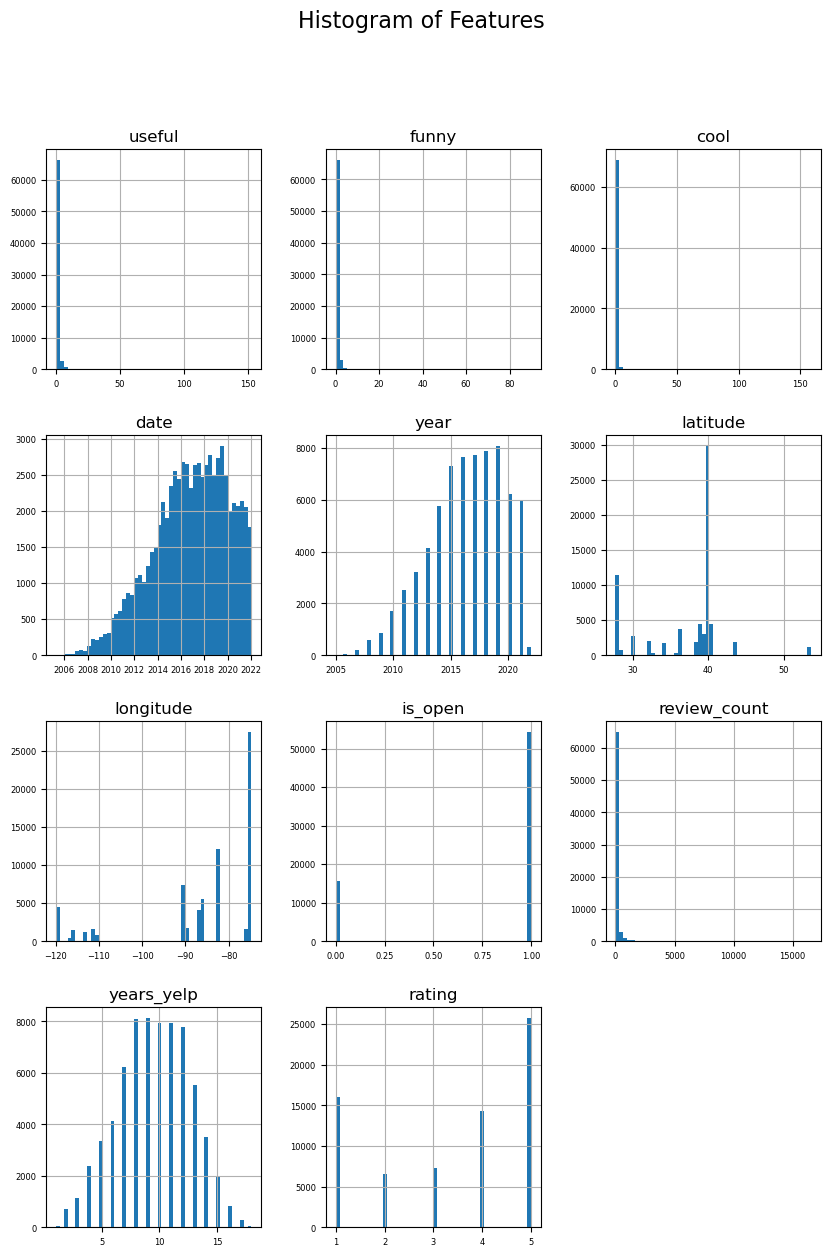

In [124]:
# Plot histograms to determine distribution of variables

reviews_df.hist(bins=50, figsize=(10,14), xlabelsize=6, ylabelsize=6)
plt.suptitle("Histogram of Features", fontsize=16)


Text(0.5, 0.98, 'Pairplots of Features')

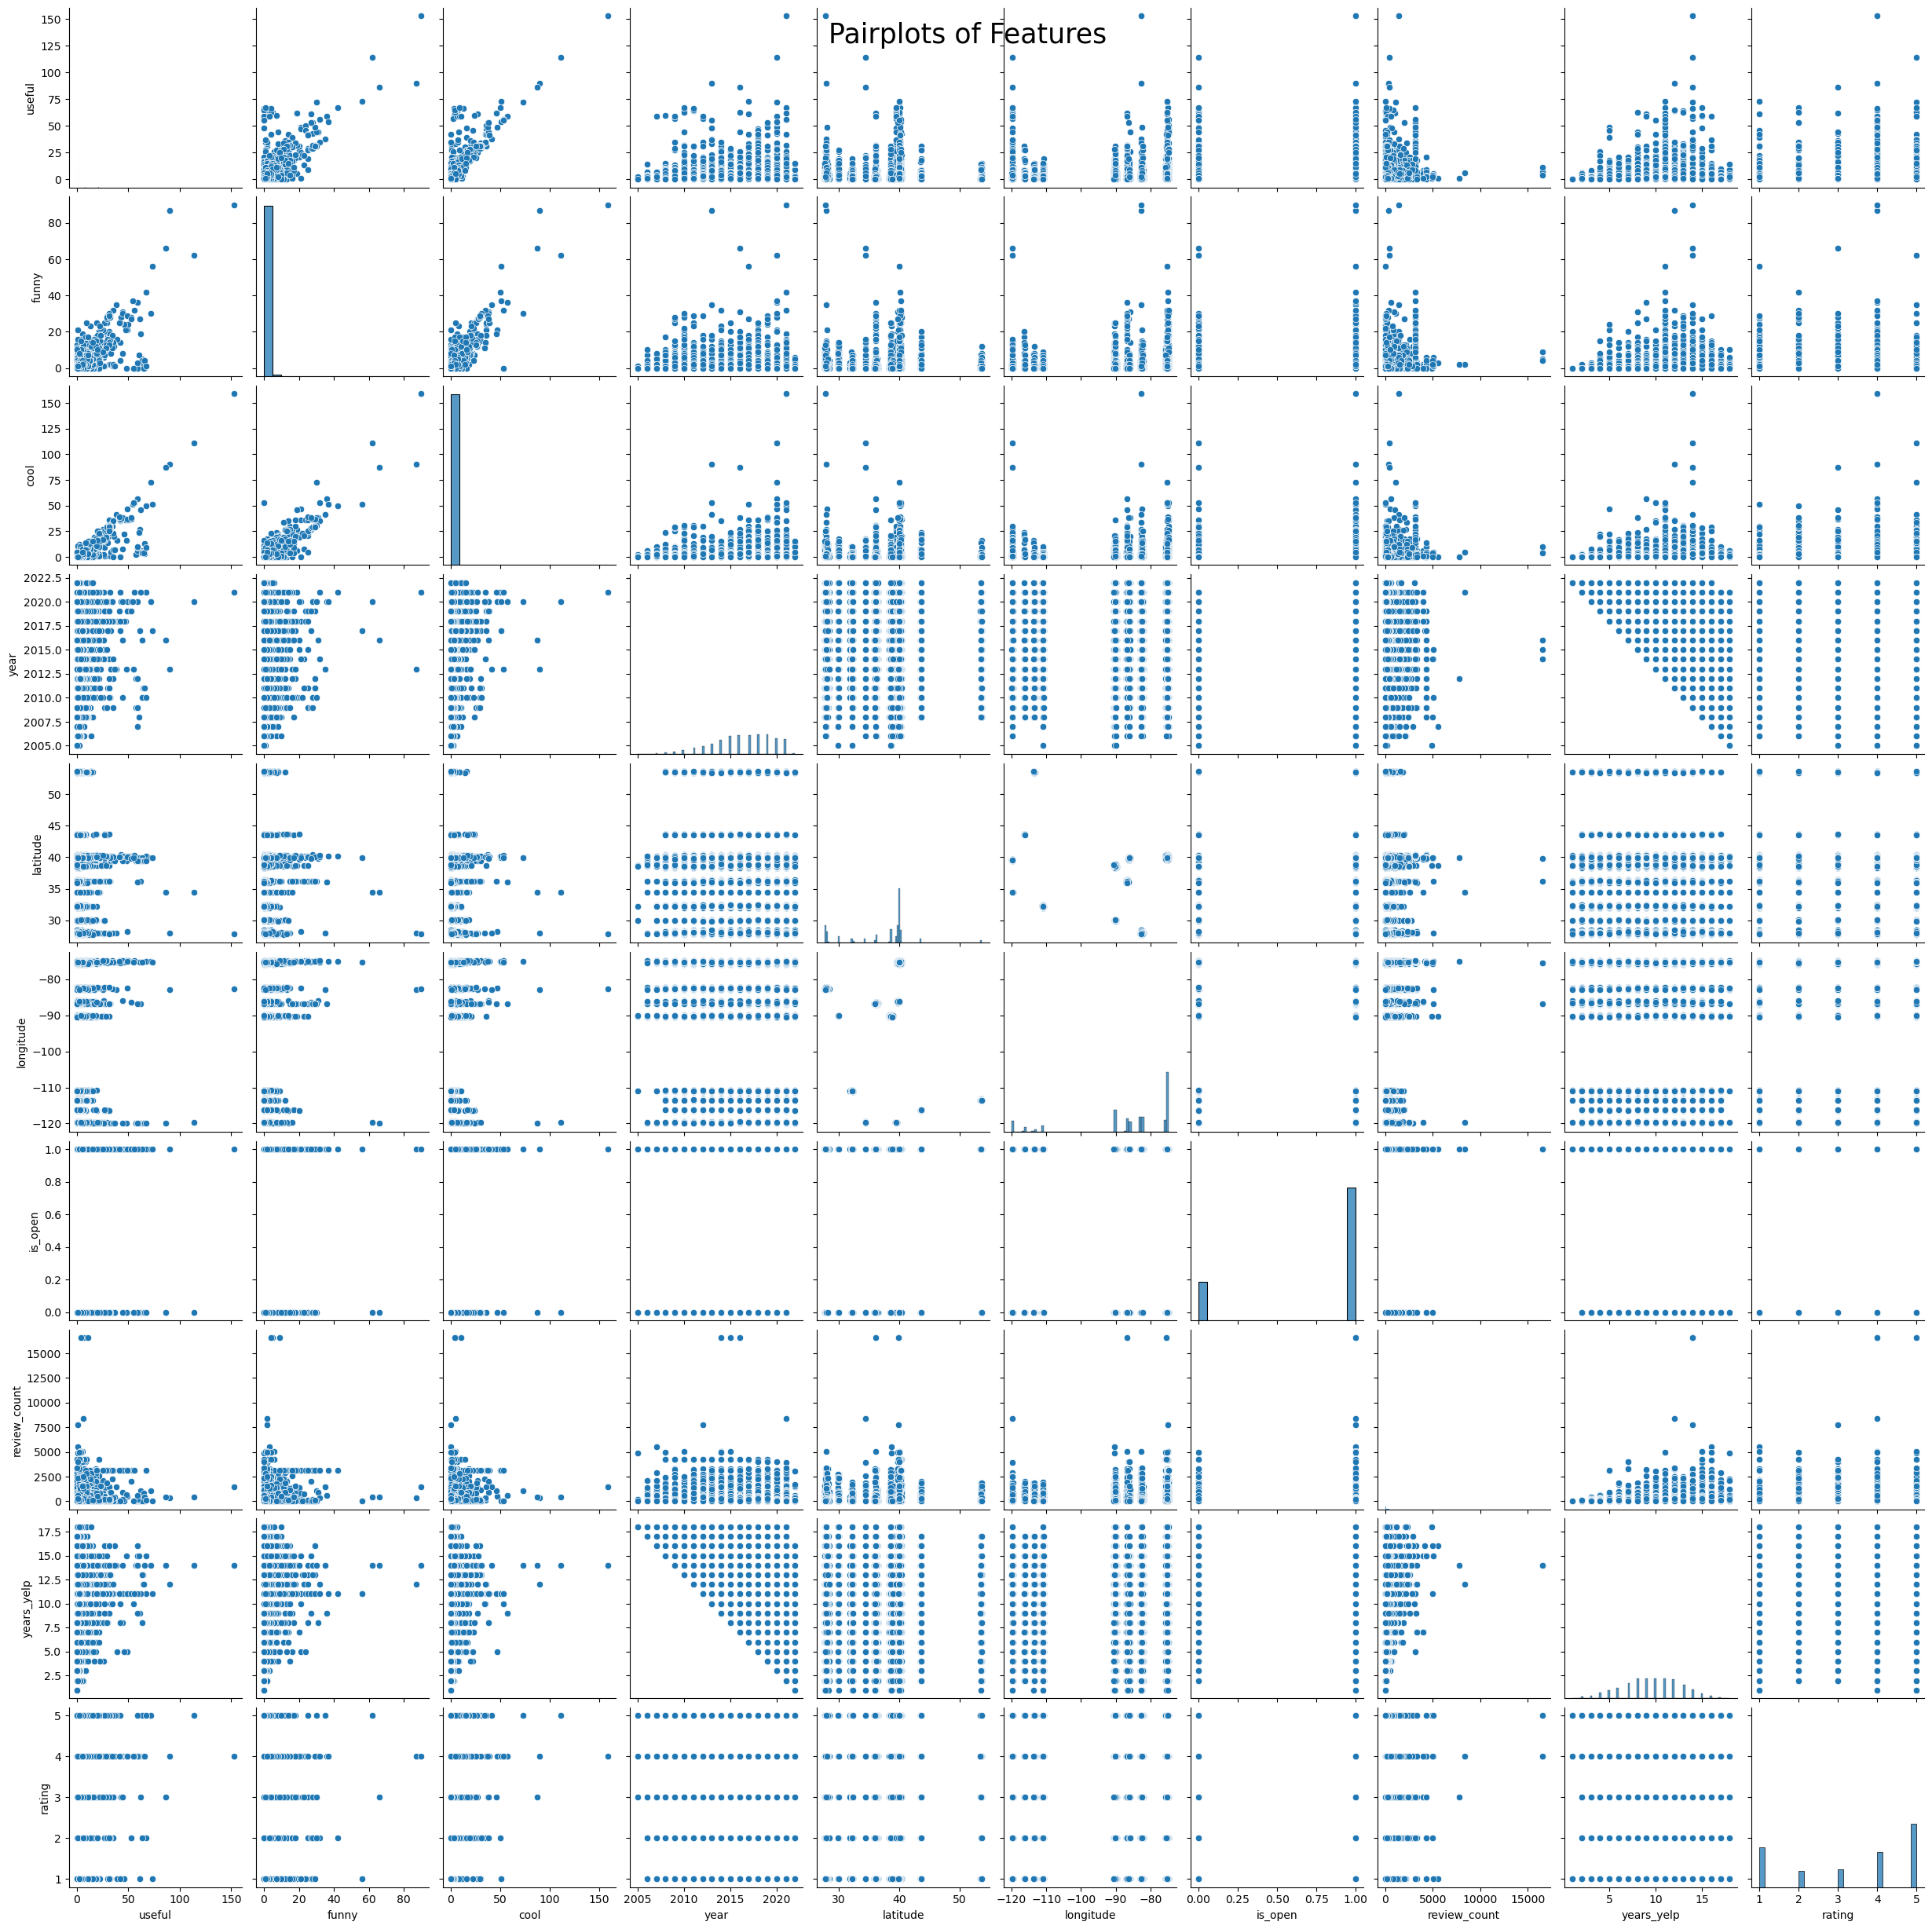

In [ ]:
# Generate Pairplots

g = sns.pairplot(reviews_df)
g.fig.suptitle("Pairplots of Features", fontsize=25)


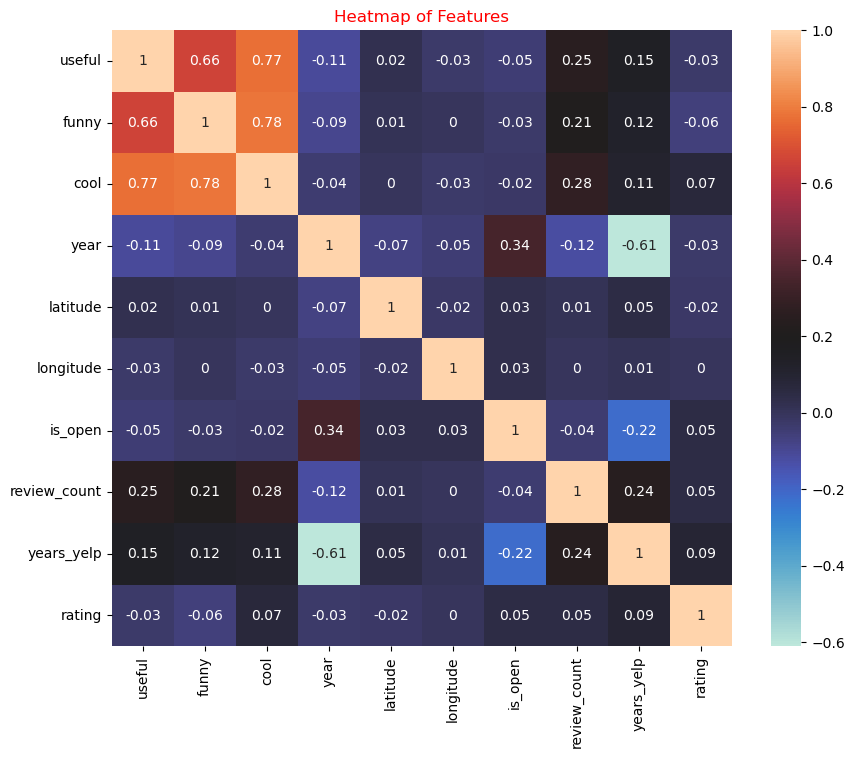

In [125]:
# Plot the correlation matrix as a heatmap

matrix = reviews_df.corr().round(2)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, annot=True, ax=ax, cmap='icefire')
ax.set_title('Heatmap of Features', color='red')



# Show the plot
plt.show()

In [126]:
# Check target labels

reviews_df['rating'].value_counts()

5.0    25790
1.0    16091
4.0    14309
3.0     7283
2.0     6596
Name: rating, dtype: int64

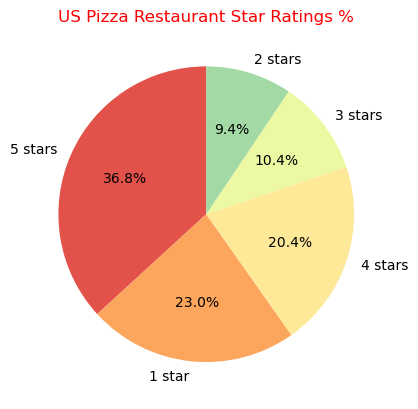

In [127]:
# Plot Piechart of Ratings

# Calculate the value counts of the target variable
value_counts = reviews_df['rating'].value_counts()

# Map the values to their corresponding star ratings
labels = value_counts.index.map({1: '1 star', 2: '2 stars', 3: '3 stars', 4: '4 stars', 5: '5 stars'})

# Create the pie chart
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Spectral'), textprops={'color': 'black'})

# Add a title
plt.title("US Pizza Restaurant Star Ratings %", color='red')

# Show the plot
plt.show()


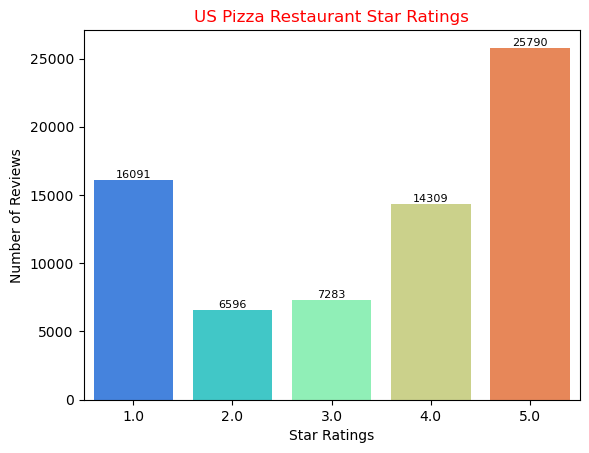

In [128]:
# Plot Restaurant Ratings

# Create the bar plot
ax = sns.barplot(x=reviews_df['rating'].value_counts().index, y=reviews_df['rating'].value_counts(), palette='rainbow')
plt.title("US Pizza Restaurant Star Ratings", color='red')

# Add value annotations to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                ha='center', va='bottom', color='black', fontsize=8)
    
# Set x and y labels
ax.set_xlabel('Star Ratings')
ax.set_ylabel('Number of Reviews')

# Show the plot
plt.show()



As shown above the majority of the ratings are 5 star

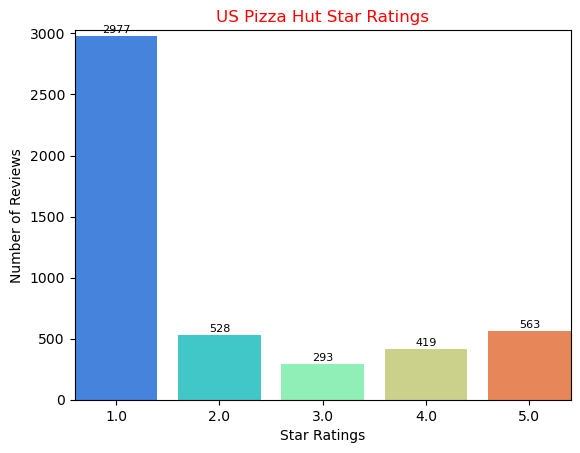

In [129]:
# Plot US Pizza Hut Star Ratings

name = 'Pizza Hut'
restaurant_df = reviews_df[reviews_df.name == name]

# Get the value counts for the ratings
rating_counts = restaurant_df.rating.value_counts()

# Create the bar plot
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='rainbow')
plt.title(f"US {name} Star Ratings", color = 'red')

# Set the y-axis limits
ax.set_ylim([0, rating_counts.max() + 50])

# Remove whitespace around bars
ax.margins(0)

# Add value annotations to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                ha='center', va='bottom', color='black', fontsize=8)

# Set x and y labels
ax.set_xlabel('Star Ratings')
ax.set_ylabel('Number of Reviews')

# Show the plot
plt.show()







As shown above the majority of Pizza Hut ratings are 1 star.

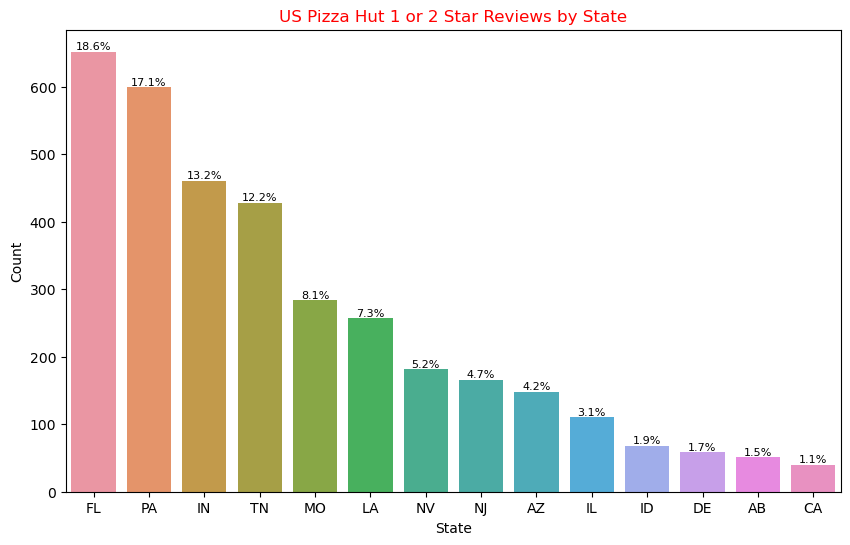

In [130]:
# Generate plot of Bad Pizza Hut States with Star Ratings of 1 or 2 Stars

# Create new dataframe
pizza_hut_bad_df = reviews_df[(reviews_df['rating'].isin([1.0, 2.0])) & (reviews_df['name'] == 'Pizza Hut')]

# Get the count of each state and sort in descending order
state_counts = pizza_hut_bad_df['state'].value_counts().sort_values(ascending=False)

# Plot the filtered data by state
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='state', data=pizza_hut_bad_df, order=state_counts.index)
plt.title('US Pizza Hut 1 or 2 Star Reviews by State', color = 'red')
plt.xlabel('State')
plt.ylabel('Count')

# Add proportional value annotations to each bar
total = len(pizza_hut_bad_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=8)

plt.show()





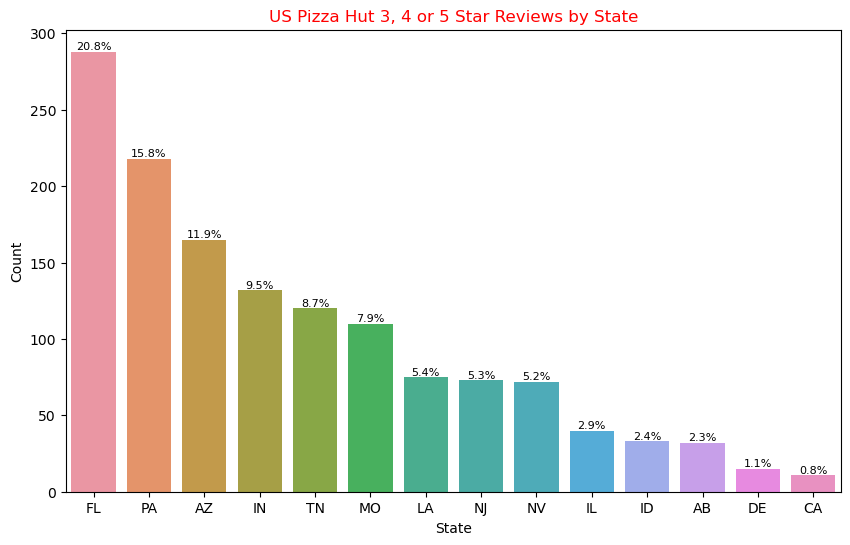

In [131]:
# Generate plot of Good Pizza Hut States with Star Ratings of 3 and above Stars

# Create new dataframe
pizza_hut_good_df = reviews_df[(reviews_df['rating'].isin([2.0, 3.0, 5.0])) & (reviews_df['name'] == 'Pizza Hut')]

# Get the count of each state and sort in descending order
state_counts = pizza_hut_good_df['state'].value_counts().sort_values(ascending=False)

# Plot the filtered data by state
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='state', data=pizza_hut_good_df, order=state_counts.index)
plt.title('US Pizza Hut 3, 4 or 5 Star Reviews by State', color = 'red')
plt.xlabel('State')
plt.ylabel('Count')

# Add proportional value annotations to each bar
total = len(pizza_hut_good_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', size=8)

plt.show()



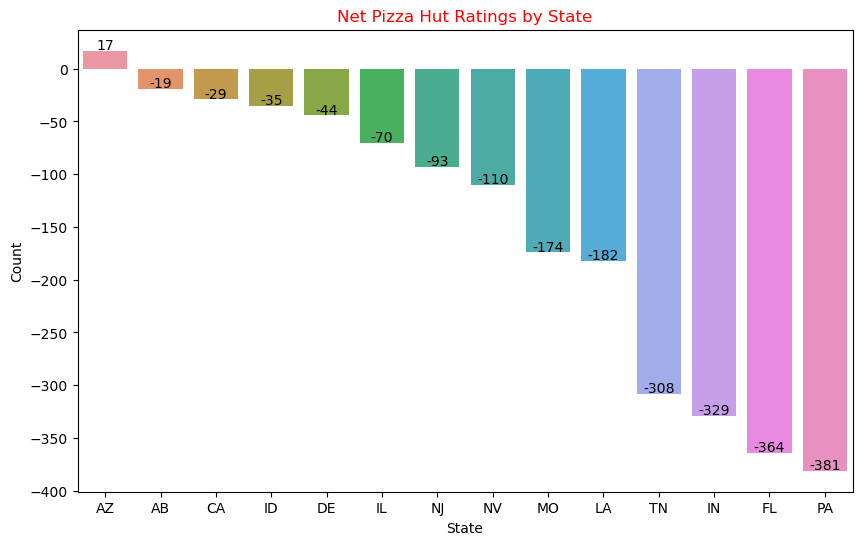

In [132]:
# Generate plot of Net Pizza Hut Ratings by State

good_state_counts = pizza_hut_good_df['state'].value_counts()
bad_state_counts = pizza_hut_bad_df['state'].value_counts()

# Calculate the net difference in counts for each state
diff_state_counts = good_state_counts - bad_state_counts

# Sort the difference in counts in descending order
diff_state_counts = diff_state_counts.sort_values(ascending=False)

# Plot the difference in counts by state
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=diff_state_counts.index, y=diff_state_counts.values)
plt.title('Net Pizza Hut Ratings by State', color = 'red')
plt.xlabel('State')
plt.ylabel('Count')

# Add labels to each bar
for i, v in enumerate(diff_state_counts.values):
    ax.text(i, v + 1, str(v), ha='center')

plt.show()


It can be seen from the plot that Philadelphia is the state which has more negative than positive reviews for Pizza Hut. 
Accordingly, it should be the first state where any rectification efforts are directed.

In [133]:
# Generate map plot of the 6 worst Net Pizza Hut Ratings by States 

import plotly.express as px

# Get the counts of reviews for each state in pizza_hut_good_df and pizza_hut_bad_df
good_state_counts = pizza_hut_good_df['state'].value_counts()
bad_state_counts = pizza_hut_bad_df['state'].value_counts()

# Calculate the net difference in counts for each state
diff_state_counts = good_state_counts - bad_state_counts
diff_state_counts = diff_state_counts.dropna().astype(int)  # Drop NaN values and convert to integers

# Get the top 6 states with the largest negative difference
top_6_negative_diff = diff_state_counts.nsmallest(6)

# Create a dataframe with the state codes and difference in counts
state_df = pd.DataFrame({'state_code': top_6_negative_diff.index, 'diff_counts': top_6_negative_diff.values})

# Define the color scale for the chloropleth map
scale = px.colors.diverging.RdYlBu[::-1]  # Reverse the color scale to make more negative values darker

# State coordinates for placing state names (Replace these with actual coordinates for your dataset)
state_coordinates = {
    'TN': {'lat': 35.517500, 'lon': -86.580400},
    'FL': {'lat': 27.664827, 'lon': -81.515754},
    'MO': {'lat': 38.573900, 'lon': -92.603200},
    'PA': {'lat': 41.203322, 'lon': -77.194525},
    'LA': {'lat': 30.984300, 'lon': -91.962300},
    'IN': {'lat': 40.267194, 'lon': -86.134902} 
}

# Create the chloropleth map using Plotly Graph Objects
fig = go.Figure()

fig.add_trace(
    go.Choropleth(locations=state_df['state_code'],
                  locationmode='USA-states',
                  z=state_df['diff_counts'],
                  colorscale=scale,
                  colorbar=dict(title='Diff Counts', x=0.9,
                                titlefont=dict(size=12),
                                tickfont=dict(size=10))
                 )
)

# Add text labels for diff_counts and state names
for index, row in state_df.iterrows():
    state_coord = state_coordinates[row['state_code']]
    fig.add_trace(
        go.Scattergeo(
            lon=[state_coord['lon']],  # Use longitude from state_coordinates
            lat=[state_coord['lat']],  # Use latitude from state_coordinates
            text=[f"{row['state_code']}<br>{row['diff_counts']}"],
            mode='text',
            showlegend=False,
            textfont=dict(color='black', size=8, family='Arial, bold')
        )
    )

# Update the title position and layout
fig.update_layout(
    title={
        'text': 'Top 6 Negative Pizza Hut Ratings by State',
        'x': 0.5,
        'xanchor': 'center',
        'y': 0.83,
        'font': dict(size=14, color='red')
    },
    geo=dict(scope='usa')
)

fig.show()



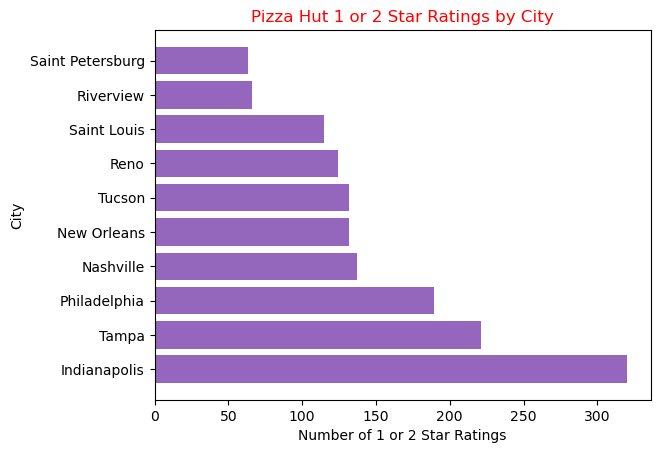

In [134]:
# Generate Histogram of Cities with 1 or 2 Star Pizza Hut Ratings

filtered_df = reviews_df[reviews_df['rating'].isin([1.0, 2.0])& (reviews_df['name'] == 'Pizza Hut')]

# group the data by city and count the number of ratings
grouped_df = filtered_df.groupby('city').count()

# sort the cities in descending order by the number of ratings and take the top 10 cities
top_cities = grouped_df.sort_values('rating', ascending=False).head(10)

# create a horizontal bar plot of the counts with a custom color
color = 'tab:purple'
plt.barh(top_cities.index, top_cities['rating'], color=color)

# add labels and title to the plot
plt.xlabel('Number of 1 or 2 Star Ratings')
plt.ylabel('City')
plt.title('Pizza Hut 1 or 2 Star Ratings by City', color='red')

# show the plot
plt.show()






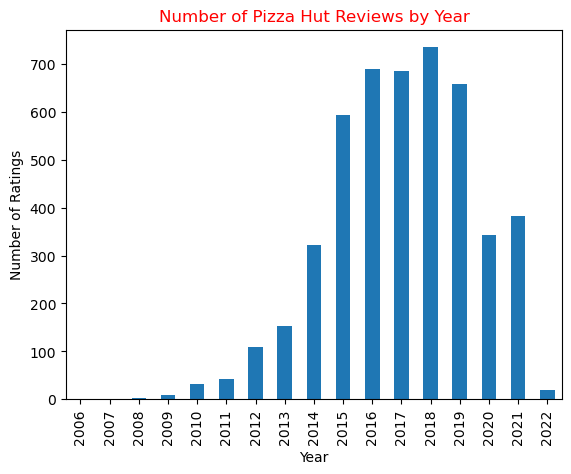

In [135]:
# Generate Histogram of Pizza Hut Reviews by year

rating_counts = reviews_df[(reviews_df['name'] == 'Pizza Hut')].groupby('year')['rating'].count()

# Create a bar plot
rating_counts.plot(kind='bar')

# Set the title and axis labels
plt.title('Number of Pizza Hut Reviews by Year', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')

# Show the plot
plt.show()



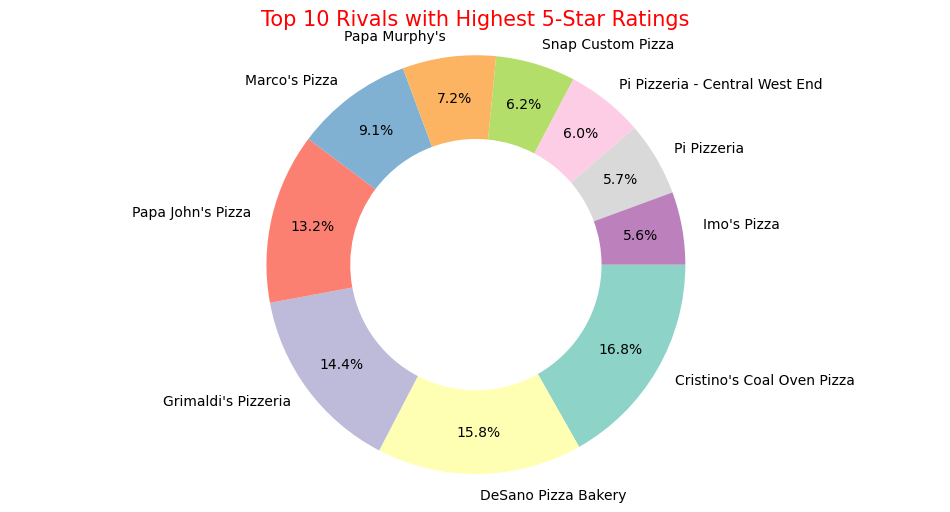

In [136]:
# Plot donut chart of top 10 rivals

filtered_df = reviews_df[(reviews_df['name'] != 'Pizza Hut') & (reviews_df['rating'] == 5)]

# Count the occurrences of each restaurant name
restaurant_counts = filtered_df['name'].value_counts()

top_restaurants = restaurant_counts.head(10)
sizes = top_restaurants.values
labels = top_restaurants.index
colors = plt.cm.Set3(np.arange(len(sizes)))

# Create a pie chart with a hole
fig, ax = plt.subplots(figsize=(12, 6))
wedges, text, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=0, pctdistance=0.80, counterclock=False, wedgeprops=dict(width=0.4))

# Move the percentage labels more outwards
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_horizontalalignment('center')

plt.title("Top 10 Rivals with Highest 5-Star Ratings", fontsize=15, color='red')
plt.axis('equal')  # Ensure the pie chart is a perfect circle
plt.show()



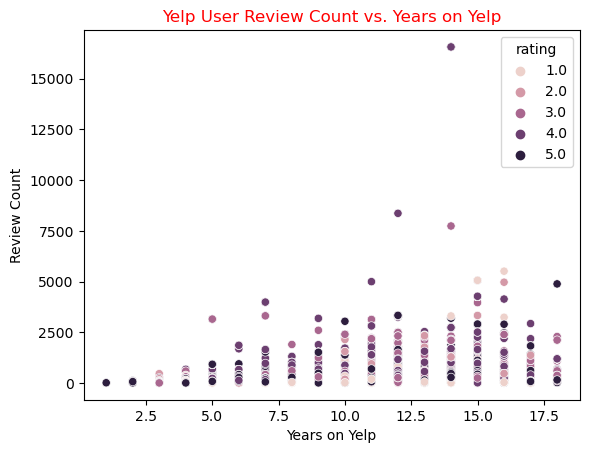

In [137]:
# Generate a scatterplot of users' years_yelp and review_count

sns.scatterplot(x='years_yelp', y='review_count', hue='rating', data=reviews_df)
plt.xlabel('Years on Yelp')
plt.ylabel('Review Count')
plt.title('Yelp User Review Count vs. Years on Yelp', color='red')
plt.show()

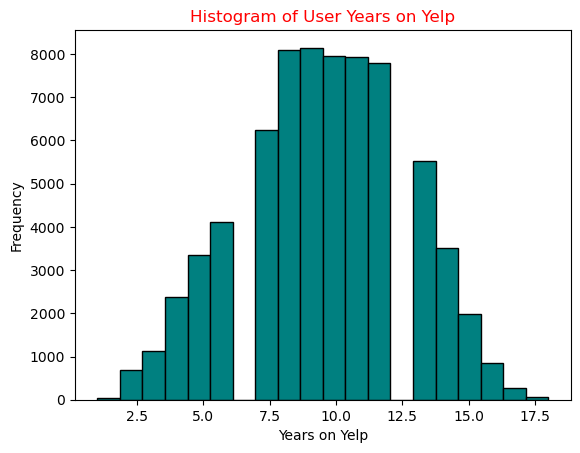

In [138]:
# Plot Histogram of Yelp Users

import matplotlib.pyplot as plt

# assuming your data is stored in a pandas DataFrame called `df`
plt.hist(reviews_df['years_yelp'], bins=20, edgecolor='black', color='teal')
plt.xlabel('Years on Yelp')
plt.ylabel('Frequency')
plt.title('Histogram of User Years on Yelp', color = 'red')
plt.show()


### Text Pre-Processing

In addition to “normal” pre-processing prior to Machine Learning modelling, additional pre-processing is required for text, in order for the data to be usable for making predictions

In [139]:
# Apply text cleaning techniques using Regular Expressions

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning function to dataset
reviews_df['text'] = reviews_df['text'].apply(lambda x: clean_text(x))

# View updated text
reviews_df['text'].head()


65     i stopped here because it was by the hotel i w...
225    love the sweet spiral plain pies at franzones ...
259    a good place to order from when its late and y...
261    i really like franzones the owner is typically...
421    best pizza ever hands downlove the peeps runni...
Name: text, dtype: object

count    70069.000000
mean        86.963779
std         78.539256
min          1.000000
25%         36.000000
50%         63.000000
75%        110.000000
max        967.000000
Name: text, dtype: float64


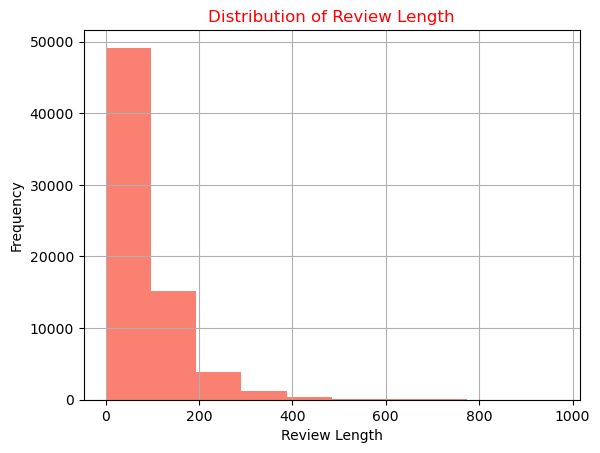

In [140]:
# Check Review length


length = reviews_df.text.apply(lambda x: len(x.split()))
print(length.describe())

plt.figure()
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.title("Distribution of Review Length", color='red')
length.hist(color='salmon')
plt.show()


In [141]:
# Determine counts of text

import numpy as np
import nltk
from nltk.tokenize import sent_tokenize


# Character counts
reviews_df["char_count"] = reviews_df["text"].map(lambda x: len(x))
# Word counts
reviews_df["word_count"] = reviews_df["text"].map(lambda x: len(x.split()))
# Sentence counts
reviews_df["sent_count"] = reviews_df["text"].map(lambda x: len(sent_tokenize(x)))
# String counts
reviews_df["hashtag_count"] = reviews_df["text"].map(lambda x: x.count("#"))
# Average word length
reviews_df["avg_word_len"] = reviews_df["text"].map(lambda x: np.mean([len(w) for w in str(x).split()]))
# Average sentence length
reviews_df["avg_sent_len"] = reviews_df["text"].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

In [142]:
# Display updated dataframe

reviews_df

,name,useful,funny,cool,text,date,year,city,state,latitude,...,user,review_count,years_yelp,rating,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
65,Just Pizza,0,0,0,i stopped here because it was by the hotel i w...,2014-08-10,2014,Indianapolis,IN,39.788154,...,Pam,24.0,9.0,5.0,347,75,1,0,3.640000,75.0
225,Franzone's Pizzeria & Restaurant,0,0,0,love the sweet spiral plain pies at franzones ...,2015-10-23,2015,Philadelphia,PA,40.026465,...,Janine,11.0,10.0,4.0,251,47,1,0,4.276596,47.0
259,Bridesburg Pizza,0,0,0,a good place to order from when its late and y...,2016-04-23,2016,Philadelphia,PA,40.001676,...,Antonio,16.0,9.0,3.0,86,17,1,0,4.058824,17.0
261,Franzone's Pizzeria & Restaurant,0,0,0,i really like franzones the owner is typically...,2016-07-14,2016,Philadelphia,PA,40.026465,...,Elyse,57.0,15.0,5.0,333,62,1,0,4.370968,62.0
421,Big Apple Pizza & Subs,0,0,1,best pizza ever hands downlove the peeps runni...,2009-08-04,2009,Sparks,NV,39.556883,...,Amy,17.0,14.0,5.0,410,78,1,0,4.217949,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989926,Snap Custom Pizza - Center City,1,0,0,i suppose these places arent created equally i...,2019-06-03,2019,Philadelphia,PA,39.950297,...,Jada,300.0,9.0,3.0,919,183,1,0,4.027322,183.0
6990135,Beach Pizza,2,1,1,pizza is great but service is awful first time...,2021-07-12,2021,Largo,FL,27.891173,...,Matt,14.0,10.0,1.0,440,83,1,0,4.253012,83.0
6990200,Romeo Pizza,2,1,0,service should be in the negatives arrived ...,2013-04-06,2013,Philadelphia,PA,39.924570,...,Cee,186.0,11.0,1.0,1110,209,1,0,4.282297,209.0
6990240,Snap Custom Pizza - Center City,5,2,5,when i first heard that the peace a pizza wer...,2017-02-23,2017,Philadelphia,PA,39.950297,...,Bill,1512.0,16.0,4.0,1370,248,1,0,4.512097,248.0


In [143]:
# Display Info

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70069 entries, 65 to 6990269
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           70069 non-null  object        
 1   useful         70069 non-null  int64         
 2   funny          70069 non-null  int64         
 3   cool           70069 non-null  int64         
 4   text           70069 non-null  object        
 5   date           70069 non-null  datetime64[ns]
 6   year           70069 non-null  int64         
 7   city           70069 non-null  object        
 8   state          70069 non-null  object        
 9   latitude       70069 non-null  float64       
 10  longitude      70069 non-null  float64       
 11  is_open        70069 non-null  int64         
 12  categories     70069 non-null  object        
 13  user           70069 non-null  object        
 14  review_count   70069 non-null  float64       
 15  years_yelp     7

Text(0.5, 1.0, 'Distribution of Character Counts')

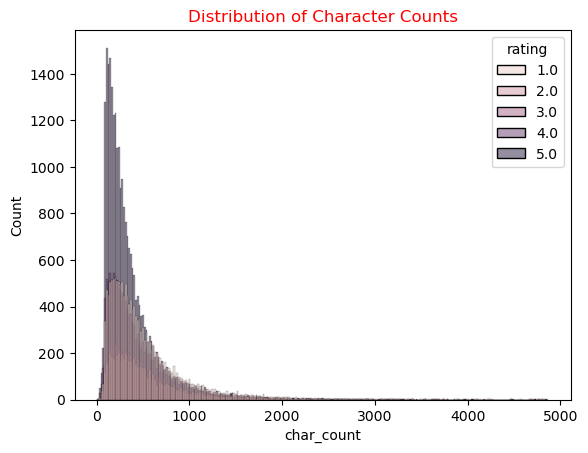

In [144]:
# Plot histogram of character counts
sns.histplot(data = reviews_df, x = reviews_df.char_count, hue = 'rating')
plt.title("Distribution of Character Counts", color='red')

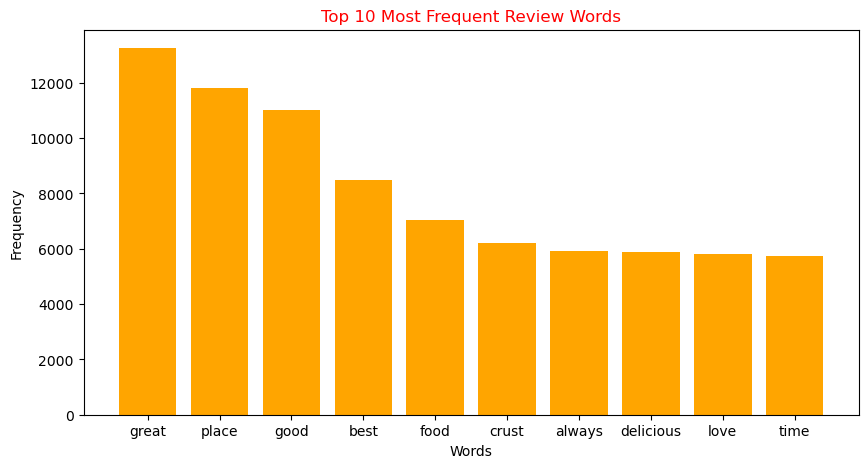

In [145]:
# Plot top 10 most frequent review words

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Define the stop words to include
additional_stops = set(['pizza', 'order', 'hut'])

# Create a set of stop words by combining the English stop words with the additional stop words
stops = set(stopwords.words('english')) | additional_stops

# Create a CountVectorizer object with the updated stop words list
co = CountVectorizer(stop_words=stops)

# Fit the CountVectorizer to your data
counts = co.fit_transform(filtered_df.text)

# Create a DataFrame with word counts
word_counts = pd.DataFrame(counts.sum(axis=0),
                           columns=co.get_feature_names_out()).T

# Sort the DataFrame by count and select the top 10 words
top_words = word_counts.sort_values(0,ascending=False).head(10)

# Plot a bar chart for the top 10 words
plt.figure(figsize=(10,5))
plt.bar(top_words.index, top_words[0], color='orange')
plt.title('Top 10 Most Frequent Review Words', color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


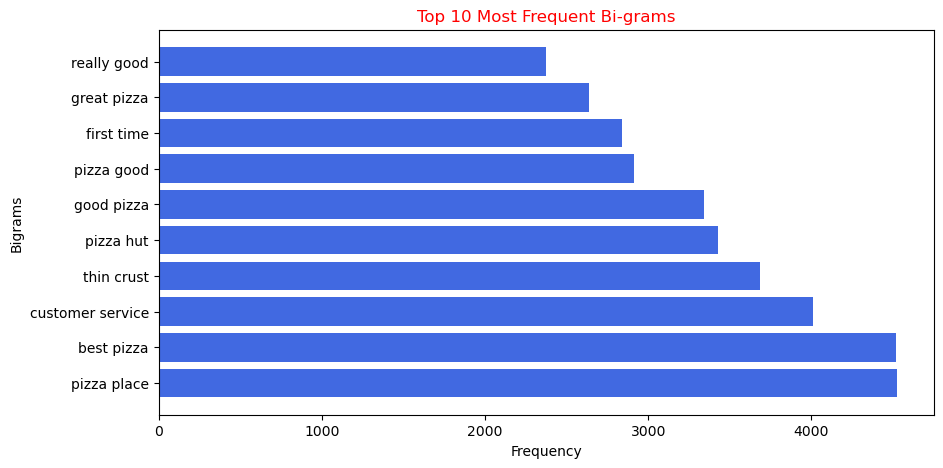

In [146]:
# Plot Bi-grams

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

stops = set(stopwords.words('english')+['com'])
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(reviews_df.text)

# create a DataFrame with bigram counts
bigram_counts = pd.DataFrame(counts.sum(axis=0),
                              columns=co.get_feature_names_out()).T

# sort the DataFrame by count and select the top 10 bigrams
top_bigrams = bigram_counts.sort_values(0,ascending=False).head(10)

# plot a horizontal bar chart for the top 10 bigrams
plt.figure(figsize=(10,5))
plt.barh(top_bigrams.index, top_bigrams[0], color='royalblue')
plt.title('Top 10 Most Frequent Bi-grams', color='red')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()




Text(0, 0.5, 'Polarity')

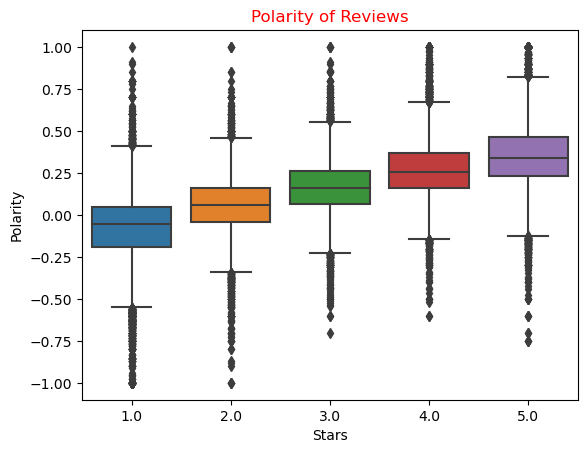

In [147]:
# Plot Polarity of Reviews

from textblob import TextBlob

reviews_df["polarity"] = reviews_df["text"].map(lambda x: np.mean([sentence.polarity for sentence in TextBlob(x).sentences]))

polarity_order = reviews_df.groupby("rating")["polarity"].median().sort_values().index

sns.boxplot(data=reviews_df, 
            y="polarity", 
            x="rating",
            order=polarity_order)

plt.title('Polarity of Reviews', color='red')
plt.xlabel('Stars')
plt.ylabel('Polarity')


In [148]:
# Topic Modelling using LatentDirichletAllocation (LDA)

from sklearn.decomposition import LatentDirichletAllocation, NMF
vectorizer = CountVectorizer(stop_words=stops)
model = vectorizer.fit(reviews_df.text)
docs = vectorizer.transform(reviews_df.text)
lda = LatentDirichletAllocation(10)
lda.fit(docs)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([(feature_names[i])
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda,vectorizer.get_feature_names_out(),10)

Topic #0: pizza best place style new good great ive crust go
Topic #1: pizza crust sauce cheese good thin like toppings slice pie
Topic #2: great pizza service place food friendly good staff always nice
Topic #3: pizza like good one crust get really pizzas toppings place
Topic #4: food place pizza like one back go dont people get
Topic #5: pizza good chicken place always best food great get ive
Topic #6: pizza salad us good great delicious time back also came
Topic #7: pizza ordered cheese wings sauce order like chicken got garlic
Topic #8: pizza pie got slice night pepperoni back ordered good time
Topic #9: order pizza called minutes time delivery said ordered told would



Text(0, 0.5, 'Proportion')

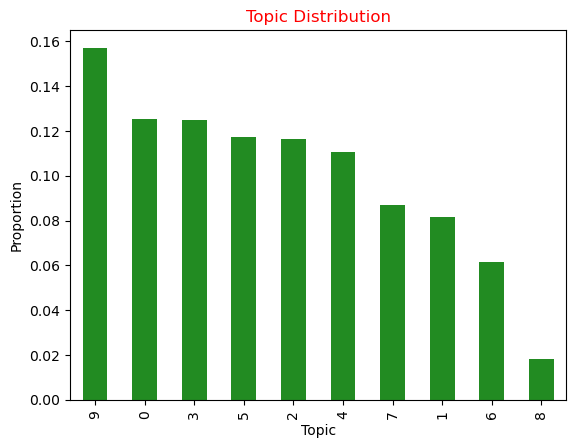

In [149]:
# Extract dominant topics and plot proprotions

reviews_df['topic']=lda.transform(docs).argmax(axis=1)

# Generate the bar plot
reviews_df.topic.value_counts(normalize=True).plot.bar(color='forestgreen')

# Add a title and axis labels
plt.title('Topic Distribution', color='red')
plt.xlabel('Topic')
plt.ylabel('Proportion')

In [150]:
# Provide sample of top topics

reviews_df[reviews_df.topic==3].text.sample(5).values

array(['as an unashamed east coast pizza snob new haven ct  best pizza in the world i can confidently say this is a delicious piepaesanos makes a tastey dough hand pulls it irregularly shaped pies yes and cooks it hoti order a cheese or pepperoni pizza light sauce well done  bellissimo',
       'the pizza was beyond satisfactory and the manager marcus was extremely helpful and kind will be returning and i would definitely recommend jules thin crust over the near by pizza shops in the neighborhood five stars',
       'its a normal papa johns we order from here every now and then when we feel like a quick and cheap pizza fix ive never had any problems with this location  our food is always ready on time and made correctly its not gourmet but itll do',
       'i resisted going to poppis for a while because it didnt seem like traditional pizza i have to say i really like the thin crust and it seems like they use fresh ingredients  i agree with another review about the small portion sizes b

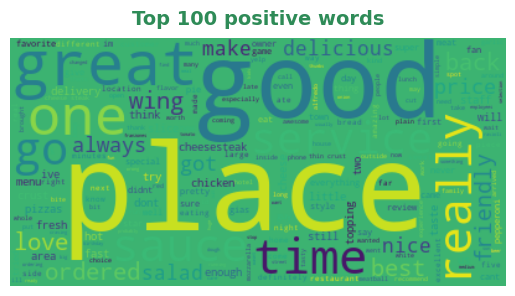

In [151]:
# Positive Word Clouds

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from functools import reduce

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["pizza", "hut", "order", "food"])
textt = " ".join(review for review in reviews_df.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

reviews_df["rating"] = pd.to_numeric(reviews_df["rating"], errors="coerce")


positive_df = reviews_df[reviews_df["rating"].ge(3)]["text"][:100]

positive_df = reduce(lambda a, b: a + b, positive_df)

# Create and generate a word cloud image
cloud_positives = WordCloud(background_color="mediumseagreen", stopwords=stopwords).generate(positive_df)

# Display the generated wordcloud image

plt.imshow(cloud_positives, interpolation="bilinear")
plt.title("Top 100 positive words", y=1.02, size=14, color='seagreen', fontweight='bold') 
plt.axis("off")  
plt.show()

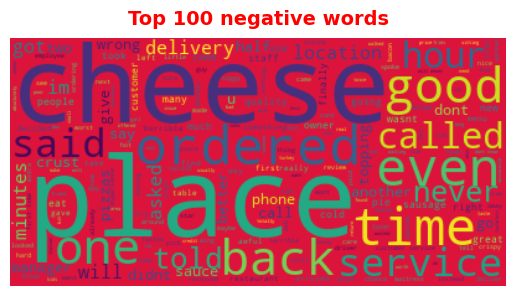

In [152]:
# Negative Word Clouds

negative_df = reviews_df[reviews_df["rating"].lt(3)]["text"][:100]
negative_df = reduce(lambda a, b: a + b, negative_df)

# Create and generate a word cloud image
cloud_negatives = WordCloud(background_color="crimson", stopwords=stopwords).generate(negative_df)

# Display the generated wordcloud image
plt.imshow(cloud_negatives, interpolation="bilinear")
plt.title("Top 100 negative words", y=1.02, size=14, color='red', fontweight='bold') 
plt.axis("off") 
plt.show()

In [153]:
# Tokenize each item in the text column

from nltk.tokenize import word_tokenize
word_tokens = [word_tokenize(text) for text in reviews_df["text"]]

# Create a new feature for the length of each review
reviews_df["n_words"] = [len(word_tokens[i]) for i in range(len(word_tokens))]

reviews_df

,name,useful,funny,cool,text,date,year,city,state,latitude,...,rating,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len,polarity,topic,n_words
65,Just Pizza,0,0,0,i stopped here because it was by the hotel i w...,2014-08-10,2014,Indianapolis,IN,39.788154,...,5.0,347,75,1,0,3.640000,75.0,0.392361,2,75
225,Franzone's Pizzeria & Restaurant,0,0,0,love the sweet spiral plain pies at franzones ...,2015-10-23,2015,Philadelphia,PA,40.026465,...,4.0,251,47,1,0,4.276596,47.0,0.161640,1,47
259,Bridesburg Pizza,0,0,0,a good place to order from when its late and y...,2016-04-23,2016,Philadelphia,PA,40.001676,...,3.0,86,17,1,0,4.058824,17.0,0.200000,9,17
261,Franzone's Pizzeria & Restaurant,0,0,0,i really like franzones the owner is typically...,2016-07-14,2016,Philadelphia,PA,40.026465,...,5.0,333,62,1,0,4.370968,62.0,0.279167,3,62
421,Big Apple Pizza & Subs,0,0,1,best pizza ever hands downlove the peeps runni...,2009-08-04,2009,Sparks,NV,39.556883,...,5.0,410,78,1,0,4.217949,78.0,0.318519,8,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989926,Snap Custom Pizza - Center City,1,0,0,i suppose these places arent created equally i...,2019-06-03,2019,Philadelphia,PA,39.950297,...,3.0,919,183,1,0,4.027322,183.0,0.138462,3,183
6990135,Beach Pizza,2,1,1,pizza is great but service is awful first time...,2021-07-12,2021,Largo,FL,27.891173,...,1.0,440,83,1,0,4.253012,83.0,0.003571,9,83
6990200,Romeo Pizza,2,1,0,service should be in the negatives arrived ...,2013-04-06,2013,Philadelphia,PA,39.924570,...,1.0,1110,209,1,0,4.282297,209.0,-0.047500,9,209
6990240,Snap Custom Pizza - Center City,5,2,5,when i first heard that the peace a pizza wer...,2017-02-23,2017,Philadelphia,PA,39.950297,...,4.0,1370,248,1,0,4.512097,248.0,0.236595,3,248


In [154]:
# Display dataset info

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70069 entries, 65 to 6990269
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           70069 non-null  object        
 1   useful         70069 non-null  int64         
 2   funny          70069 non-null  int64         
 3   cool           70069 non-null  int64         
 4   text           70069 non-null  object        
 5   date           70069 non-null  datetime64[ns]
 6   year           70069 non-null  int64         
 7   city           70069 non-null  object        
 8   state          70069 non-null  object        
 9   latitude       70069 non-null  float64       
 10  longitude      70069 non-null  float64       
 11  is_open        70069 non-null  int64         
 12  categories     70069 non-null  object        
 13  user           70069 non-null  object        
 14  review_count   70069 non-null  float64       
 15  years_yelp     7

In [155]:
# Create dataframe to check features

dfnew = reviews_df[['cool','is_open','review_count', 'years_yelp', 'polarity','topic', 'rating' ]]

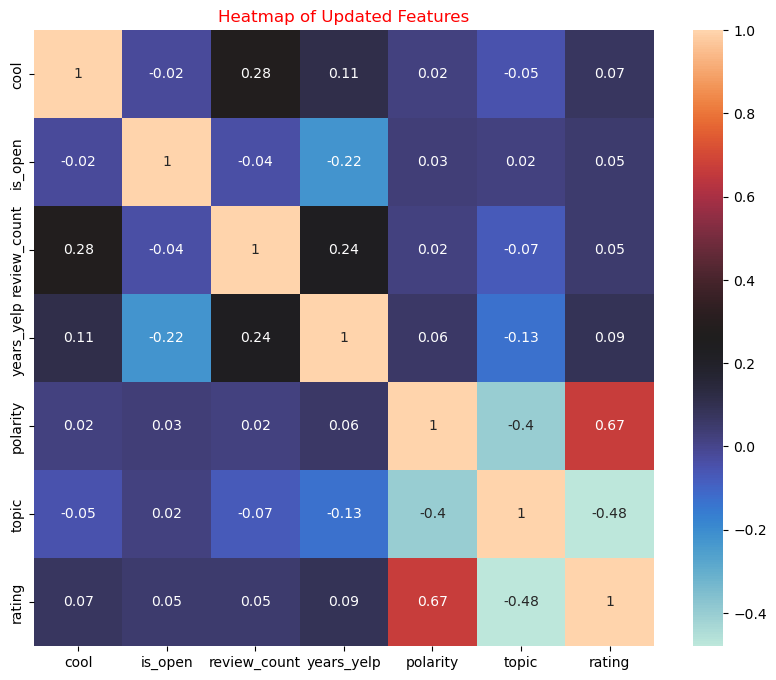

In [156]:
# Plot the correlation matrix as a heatmap of updated features

matrix = dfnew.corr().round(2)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, annot=True, ax=ax, cmap='icefire')
ax.set_title('Heatmap of Updated Features', color='red')



# Show the plot
plt.show()

The above heatmap shows that "polarity" and "years_yelp" are the two features with the greatest positive correlation to rating whilst "topic" has a slight negative correlation. These features will form the basis of modelling using various algorithms for sentiment analysis.

In [ ]:
# Create Pizza Hut 2 dataframe for the purpose of modelling

# pizza_hut2_df = reviews_df[reviews_df['name'] == "Pizza Hut"]

In [ ]:
# # Write to csv

# pizza_hut2_df.to_csv('pizza_hut2.csv')

The file pizza_hut2.csv will be used for the purpose of modelling.

### EDA Conclusions & Recommendations

EDA has revealed many insights which Pizza Hut can immediately act upon. It has revealed which states are the ones to focus on, the poorly performing cities which competitors Pizza Hut USA should futher investigate as to what they are doing right. Analysing the text itself has shown that place and thin crust are what people value highly when choosing a pizza.

Notwithstanding the determination of which algorithm will provide the best prediction accuracy, Pizza now has a better picture from text data using Natural Language Processing (NLP) as to where its at and where to focus its resources on to improve its market position.

### References

- Elizabeth, E 2020, 11 Best Restaurant Review Sites for 2022 - Restaurant Clicks, restaurantclicks.com, viewed 9 May 2023, <https://restaurantclicks.com/restaurant-review-sites/>.
- Ibisworld 2023, IBISWorld - Industry Market Research, Reports, and Statistics, www.ibisworld.com, viewed 6 May 2023, <https://www.ibisworld.com/united-states/market-research-reports/pizza-restaurant-franchises-industry/>.
- Lake, A 2022, 4 Major Fast-Food Chains With Declining Sales This Year — Eat This Not That, eatthis.com, viewed 21 November 2022, <https://www.eatthis.com/news-major-restaurant-chains-declining-sales-2022/>.
- Tan, KL, Lee, CP & Lim, KM 2023, ‘A Survey of Sentiment Analysis: Approaches, Datasets, and Future Research’, Applied Sciences, vol. 13, no. 7, p. 4550.
- yelp 2019, Yelp Dataset, Yelp.com, viewed 6 May 2023, <https://www.yelp.com/dataset>.
- Yum! 2023, Financial Reports - Yum! Brands, investors.yum.com, viewed 12 May 2023, <https://investors.yum.com/financial-information/financial-reports/>.
